In [1]:
# fix sys.path to load MDAnalysis from conda packages
import sys
python_home_path = '/homes/sanjuan/.local/lib/python3.8/site-packages'
sys.path[sys.path.index(python_home_path)] = ''

In [2]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

In [ ]:
workdir = "data/cWza-S355C_conformation1_0050/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

# Total count: undifferentiated selection

In [3]:
hbonds = HBA(universe=u)
hbonds.hydrogens_sel = hbonds.guess_hydrogens("protein")
hbonds.acceptors_sel = hbonds.guess_acceptors("protein")
hbonds.run()

/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:2261: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(sorted(unique_bonds)), 4)
/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/topologyobjects.py:600: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  guessed = np.asarray(guessed, dtype=np.bool)


In [4]:
hbond_counting_raw = hbonds.count_by_type()
hbond_counting_sorted = sorted(hbond_counting_raw, key=lambda x: int(x[-1]), reverse=True)
hbond_counting_sorted

/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:539: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = self.u.atoms[self.hbonds[:, 1].astype(np.int)]
/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:543: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar 

[array(['ARG:opls_300', 'ASP:opls_272', '3259'], dtype='<U21'),
 array(['HIS:opls_503', 'ASP:opls_272', '3011'], dtype='<U21'),
 array(['TYR:opls_167', 'GLU:opls_272', '2347'], dtype='<U21'),
 array(['ARG:opls_300', 'GLU:opls_272', '1619'], dtype='<U21'),
 array(['ARG:opls_303', 'GLU:opls_272', '951'], dtype='<U21'),
 array(['ARG:opls_300', 'THR:opls_154', '782'], dtype='<U21'),
 array(['ARG:opls_300', 'THR:opls_272', '480'], dtype='<U21'),
 array(['THR:opls_154', 'ASP:opls_272', '475'], dtype='<U21'),
 array(['THR:opls_154', 'GLU:opls_272', '402'], dtype='<U21'),
 array(['LYS:opls_287', 'GLU:opls_272', '282'], dtype='<U21'),
 array(['LYS:opls_287', 'THR:opls_272', '245'], dtype='<U21'),
 array(['ARG:opls_303', 'THR:opls_154', '169'], dtype='<U21'),
 array(['THR:opls_154', 'THR:opls_272', '129'], dtype='<U21'),
 array(['ARG:opls_303', 'THR:opls_272', '97'], dtype='<U21'),
 array(['TYR:opls_167', 'THR:opls_272', '73'], dtype='<U21'),
 array(['TYR:opls_167', 'ASP:opls_272', '61'], dtype=

In [ ]:
data_destilated = hbond_counting_sorted[:16]
set_donors_acceptors = set([(x[0].split(':')[0], x[1].split(':')[0]) for x in data_destilated])
set_donors_acceptors

In [5]:
data_protein = hbonds.count_by_time()

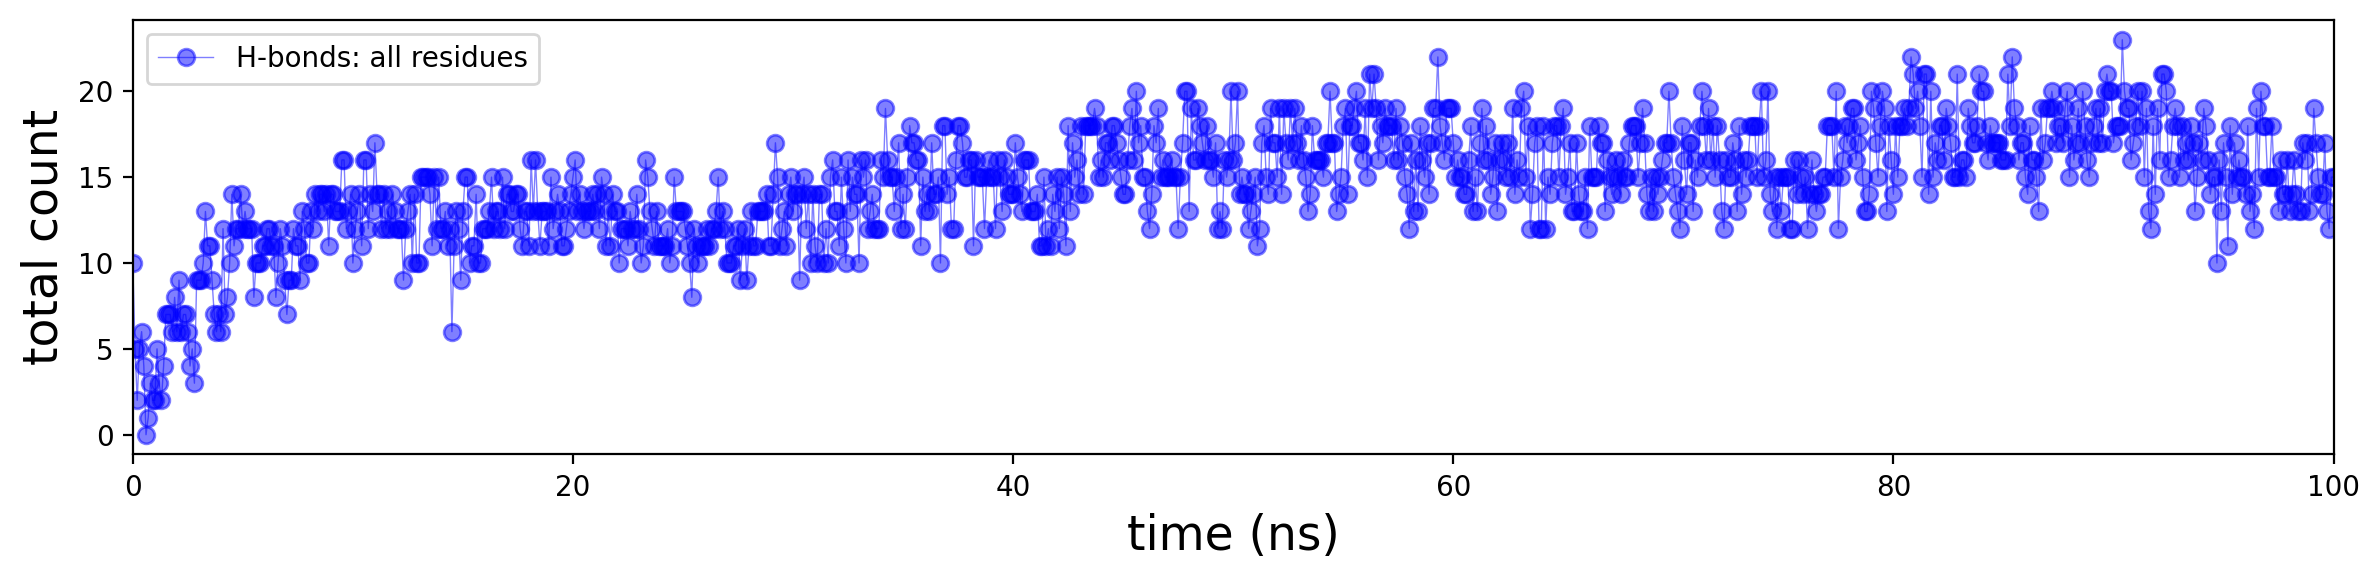

In [10]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(12,3),sharex=True,sharey=True,dpi=200)

t_initial = 0
t_final = 100
n_frames = 1001
timeline = np.linspace(t_initial,t_final,n_frames)

ax.plot(
    timeline,
    data_protein,
    color='blue',
    marker='o',
    label='H-bonds: all residues',
    lw=0.5,
    alpha=0.5
)

ax.legend()
ax.set_xlim(0, 100)
ax.set_xlabel("time (ns)",fontsize=17)
ax.set_ylabel("total count",fontsize=17)
fig.tight_layout()

plt.show()

# TEST: Nonconsecutive chains.

This must produce a zero count of H-bonds

In [10]:
hbonds = HBA(universe=u)

protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
protein_acceptors_sel = hbonds.guess_acceptors("protein")
hbonds.hydrogens_sel = f"not backbone and segid seg_0_Protein_chain_A"
hbonds.acceptors_sel = f"not backbone and segid seg_1_Protein_chain_B"
hbonds.run()

In [9]:
hbond_counting_raw = hbonds.count_by_type()
hbond_counting_sorted = sorted(hbond_counting_raw, key=lambda x: int(x[-1]), reverse=True)
hbond_counting_sorted

[]

# Inter-chain H-bonds: cWza-S355C

In [2]:
import sys
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

In [ ]:
workdir = "data/cWza-S355C_conformation1_0050/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

## Analysis: BB-BB H-bonds

In [42]:
HBA_data = {}

chains = "abcdefgha"
for i in range(8):
    k1, k2 = (i, (i+1)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for Clockwise H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
    # Counter-clockwise H-bonds
    print("INFO: Searching for Counter-clockwise H-bonds")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + acceptor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + donor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain2_name + chain1_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_bb_bb = HBA_data

INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B


/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:2261: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(sorted(unique_bonds)), 4)
/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/topologyobjects.py:600: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  guessed = np.asarray(guessed, dtype=np.bool)
/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/analy

INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_0_Protein_chain_A
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_3_Protein_chain_D
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_4_Protein_chain_E
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_4_Protein_chain_E

## Analysis: SC-SC H-bonds

In [43]:
HBA_data = {}

chains = "abcdefgha"
for i in range(8):
    k1, k2 = (i, (i+1)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for Clockwise H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
    # Counter-clockwise H-bonds
    print("INFO: Searching for Counter-clockwise H-bonds")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + acceptor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + donor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain2_name + chain1_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_sc_sc = HBA_data

INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_0_Protein_chain_A
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_3_Protein_chain_D
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for Clockwise H-bonds
You sele

## Analysis: SC-BB H-bonds

In [272]:
HBA_data = {}

chains = "abcdefgha"
for i in range(8):
    k1, k2 = (i, (i+1)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for Clockwise H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
    # Counter-clockwise H-bonds
    print("INFO: Searching for Counter-clockwise H-bonds")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + acceptor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + donor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain2_name + chain1_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_sc_bb = HBA_data

INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B


/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:2261: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(sorted(unique_bonds)), 4)
/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/topologyobjects.py:600: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  guessed = np.asarray(guessed, dtype=np.bool)
/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/analy

INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_0_Protein_chain_A
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_3_Protein_chain_D
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_4_Protein_chain_E
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and

## Analysis: BB-SC H-bonds

In [287]:
HBA_data = {}

chains = "abcdefgha"
for i in range(8):
    k1, k2 = (i, (i+1)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for Clockwise H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
    # Counter-clockwise H-bonds
    print("INFO: Searching for Counter-clockwise H-bonds")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + acceptor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + donor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain2_name + chain1_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_bb_sc = HBA_data

INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B


/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:2261: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(sorted(unique_bonds)), 4)
/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/topologyobjects.py:600: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  guessed = np.asarray(guessed, dtype=np.bool)
/data/dragon000/sanjuan/anaconda3/lib/python3.8/site-packages/MDAnalysis/analy

INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_0_Protein_chain_A
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_3_Protein_chain_D
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  not backbone and segid seg_4_Protein_chain_E
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and seg

## Visualisation: BB-BB H-bonds,  heatmaps

We can't visualise these data, as these are null for all chain pairs.
The test below proves it.

In [270]:
all([all(HBA_data_bb_bb[key]['time'] == 0) for key in HBA_data_bb_bb.keys()])

True

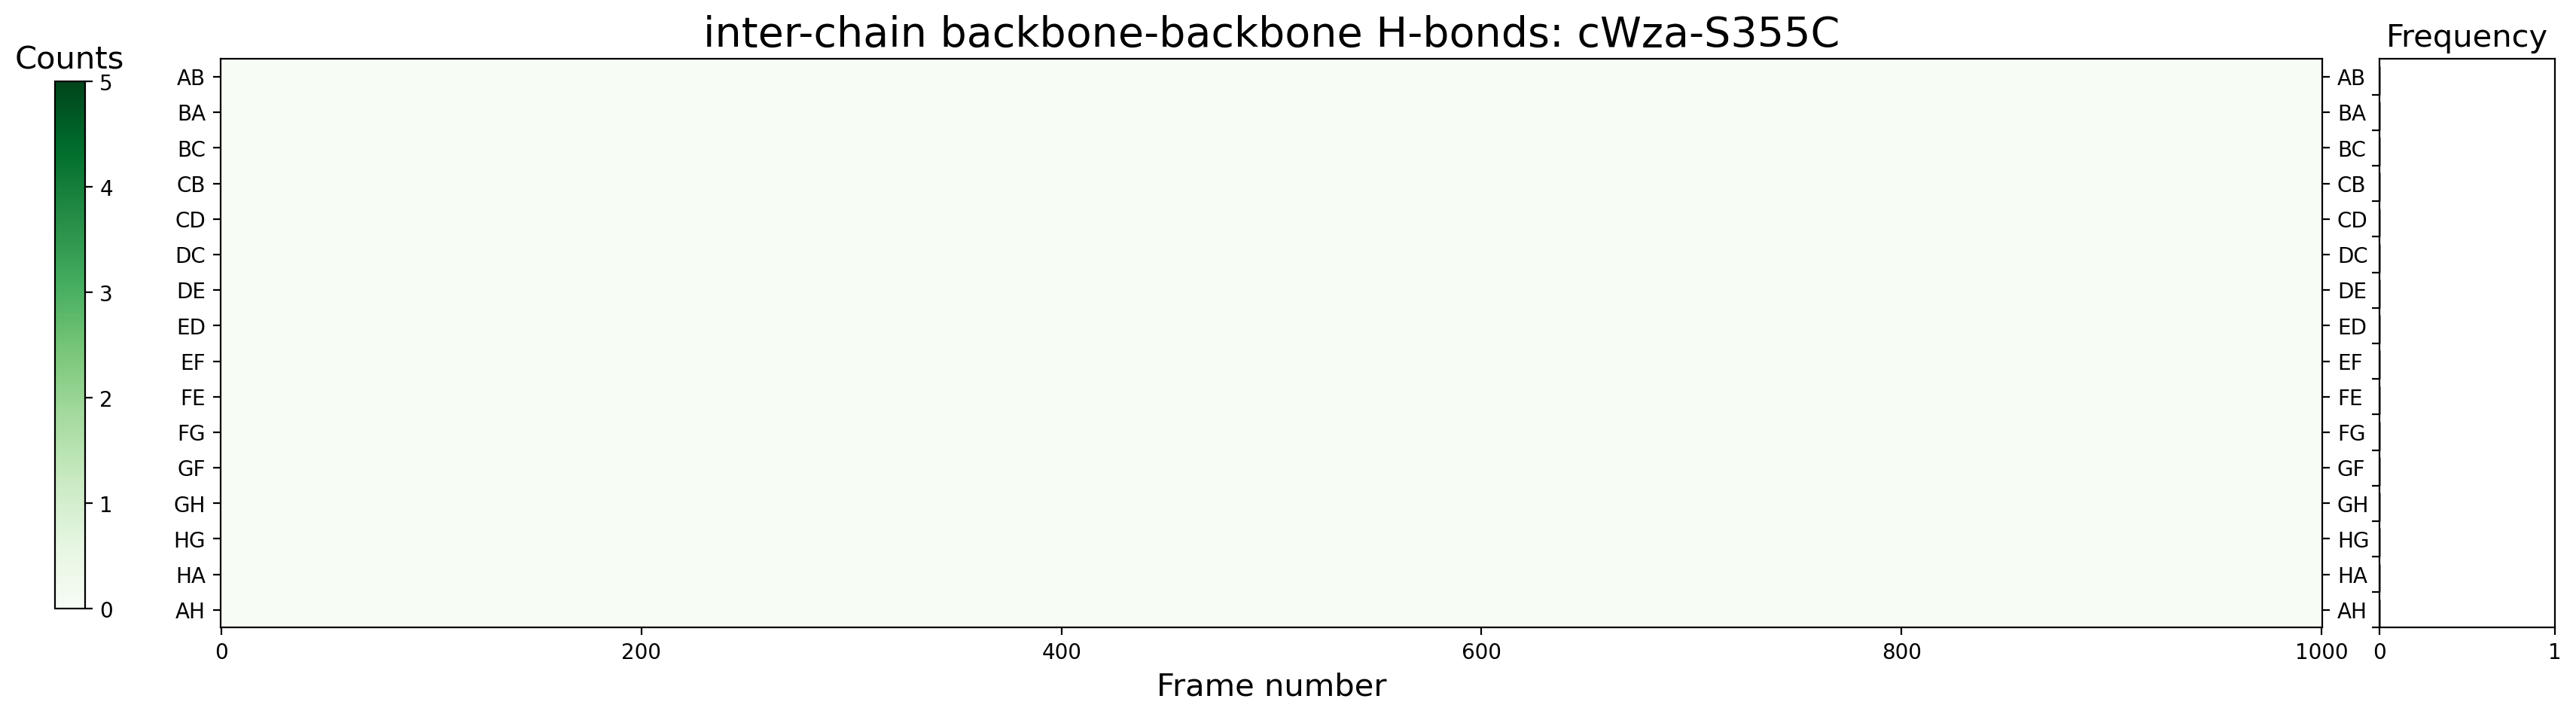

In [319]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_bb_bb
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,5), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = 5,#data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("inter-chain backbone-backbone H-bonds: cWza-S355C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: SC-BB H-bonds,  heatmaps

We can't visualise these data, as these are null for all chain pairs.
The test below proves it.

In [273]:
all([all(HBA_data_sc_bb[key]['time'] == 0) for key in HBA_data_sc_bb.keys()])

False

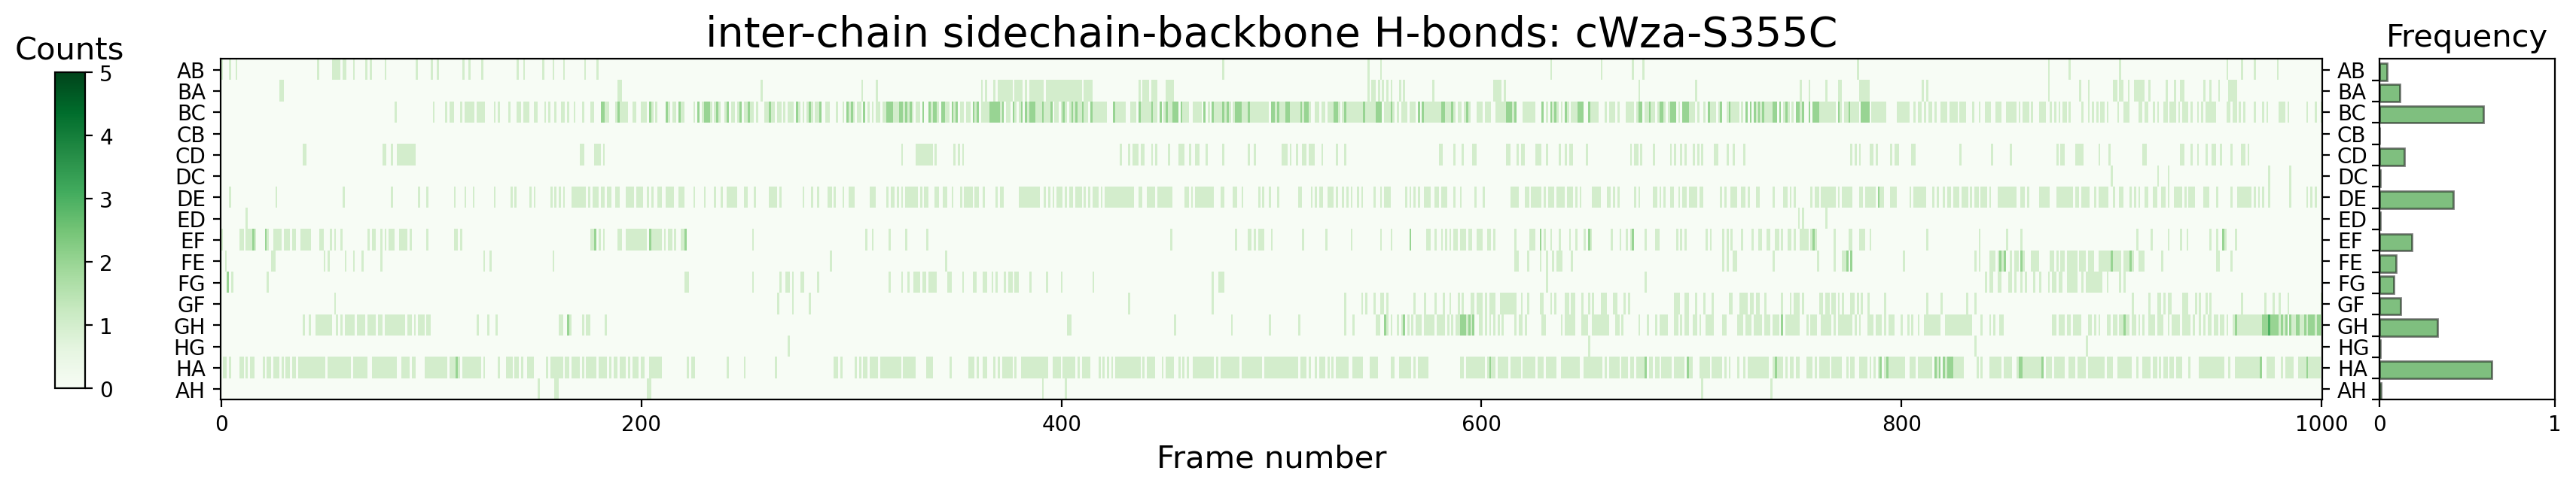

In [329]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_sc_bb
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = 5,#data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("inter-chain sidechain-backbone H-bonds: cWza-S355C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: BB-SC H-bonds,  heatmaps

We can't visualise these data, as these are null for all chain pairs.
The test below proves it.

In [304]:
all([all(HBA_data_bb_sc[key]['time'] == 0) for key in HBA_data_bb_sc.keys()])

False

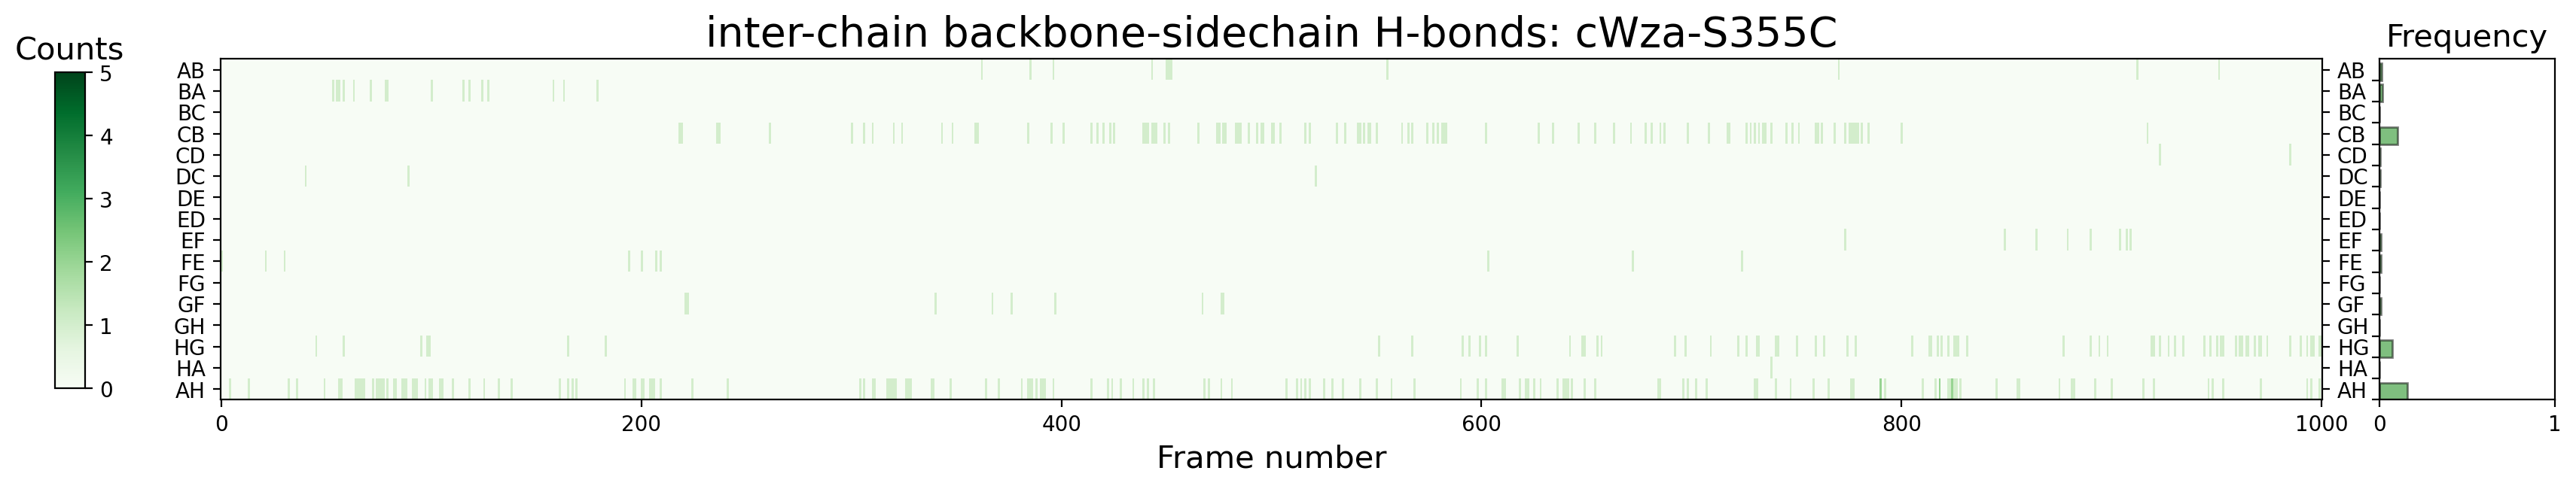

In [328]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_bb_sc
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = 5,#data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("inter-chain backbone-sidechain H-bonds: cWza-S355C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: SC-SC H-bonds,  heatmaps

In [306]:
all([all(HBA_data_sc_sc[key]['time'] == 0) for key in HBA_data_sc_sc.keys()])

False

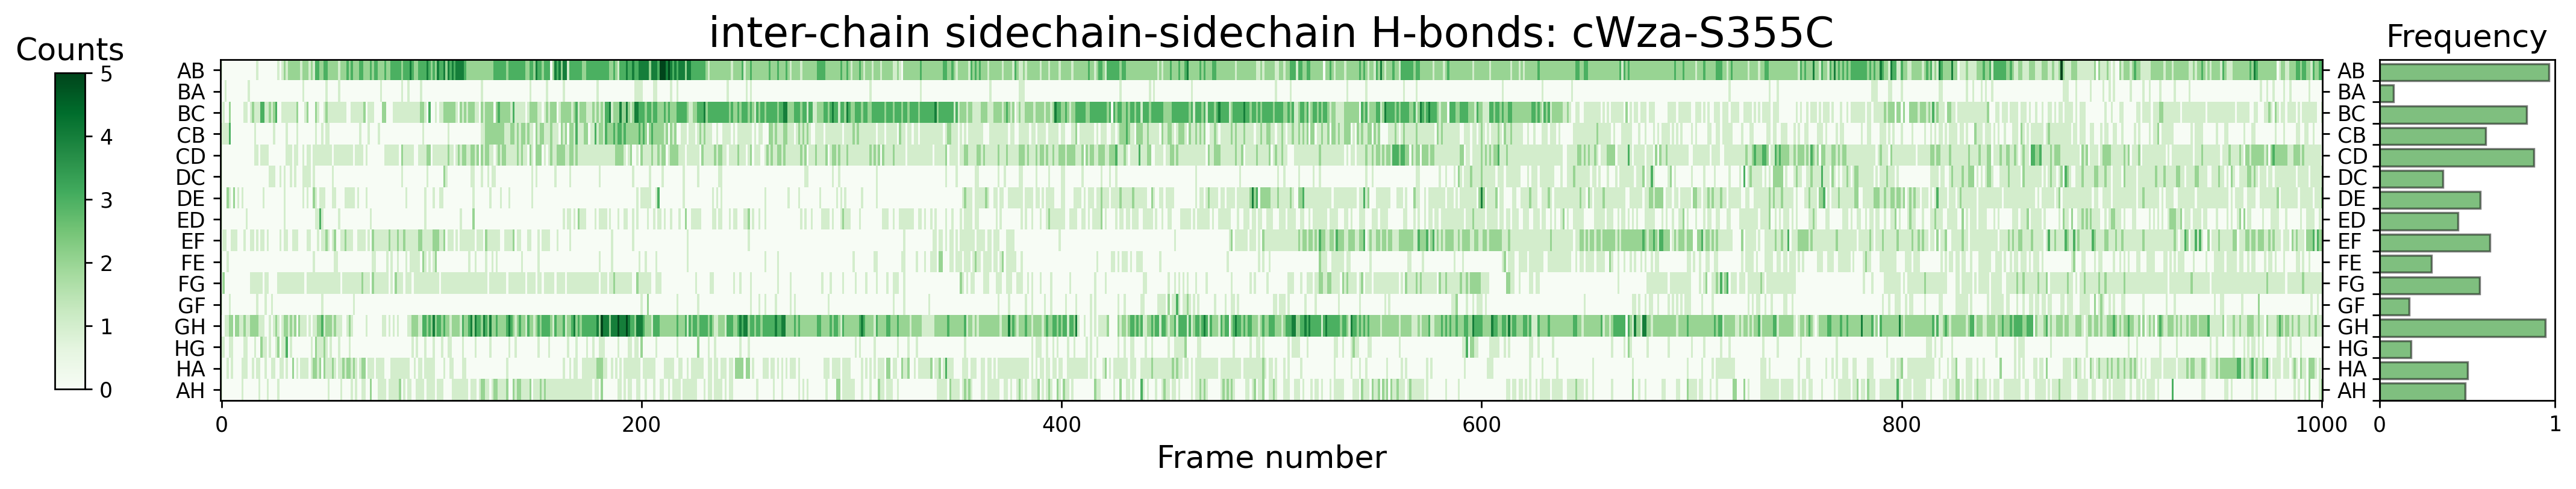

In [327]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_sc_sc
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=250)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = 5,#data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("inter-chain sidechain-sidechain H-bonds: cWza-S355C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

Binary

In [45]:
import pickle
with open("data/cWza-S355C_0050_HBA.pckl",'rb') as fp:
    HBA_data_all = pickle.load(fp)

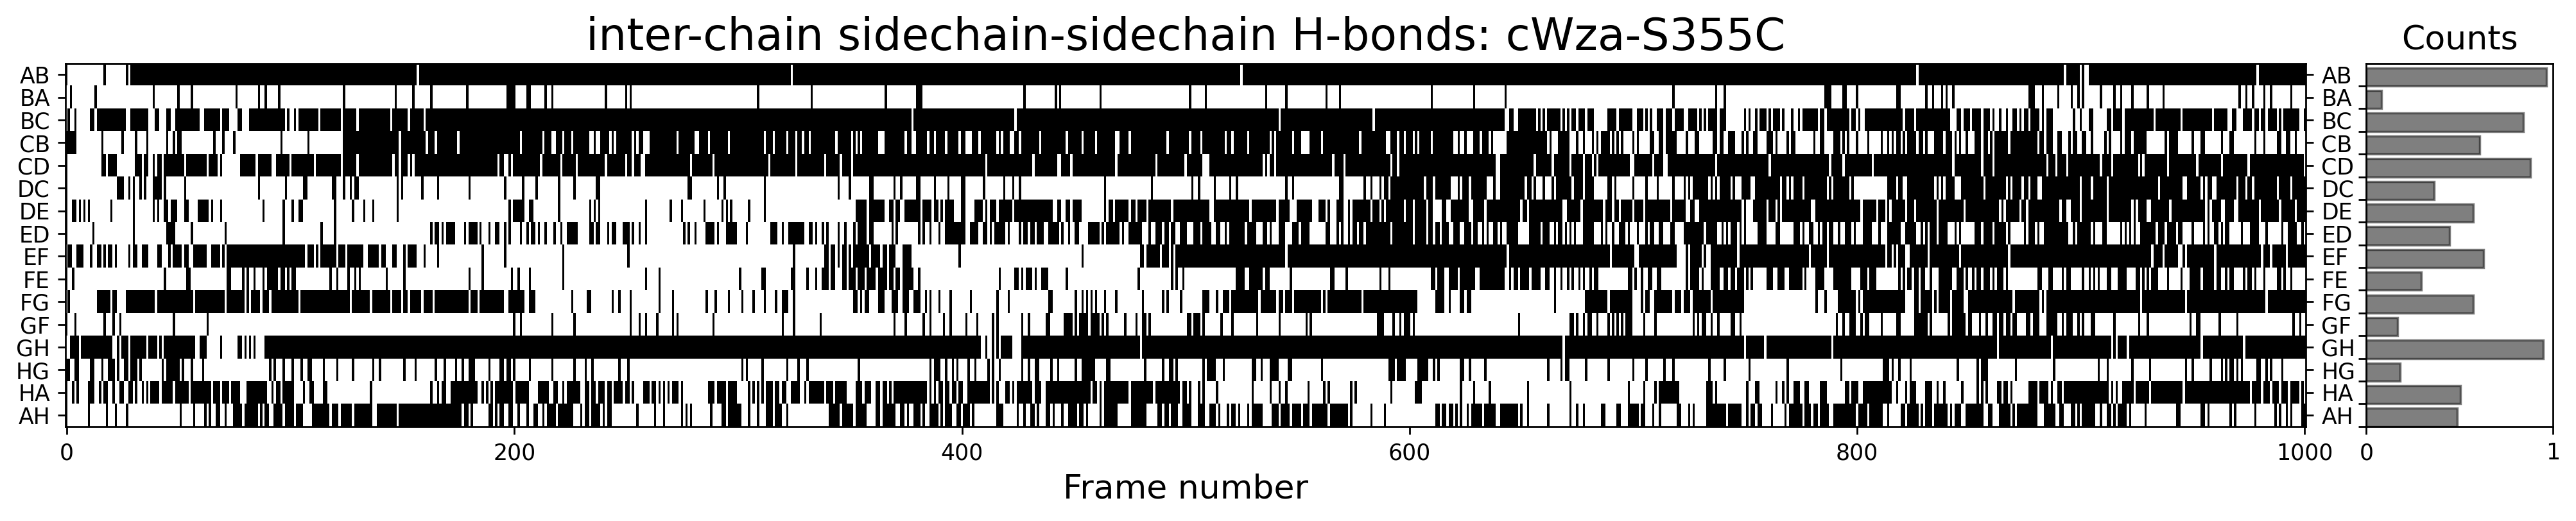

In [47]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_sc_sc = HBA_data_all['sc-sc']
data_matrix = np.array([np.array(X[key]['time']) > 0 for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=250)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               #vmin = 0,
               #vmax = 5,#data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="binary",
               alpha=1)

# customise colorbar
# cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
# plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("inter-chain sidechain-sidechain H-bonds: cWza-S355C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='black', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Save data

In [331]:
HBA_data_all = {'bb-bb':HBA_data_bb_bb,
                'bb-sc':HBA_data_bb_sc,
                'sc-bb':HBA_data_sc_bb,
                'sc-sc':HBA_data_sc_sc}

In [334]:
import pickle
with open("data/cWza-S355C_0050_HBA.pckl",'wb') as fp:
    pickle.dump(HBA_data_all, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [335]:
ls -lrth data/cWza-S355C_0050_HBA.pckl

-rw------- 1 sanjuan acadrel 643K Oct  1 17:44 data/cWza-S355C_0050_HBA.pckl


# Inter-chain H-bonds: cWza-Y373C

In [1]:
import sys
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

In [2]:
import MDAnalysis as mda
workdir = "data/cWza-Y373C_conformation1_0337/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

## Analysis: BB-BB H-bonds

In [3]:
HBA_data = {}

chains = "abcdefgha"
for i in range(8):
    k1, k2 = (i, (i+1)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for Clockwise H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
    # Counter-clockwise H-bonds
    print("INFO: Searching for Counter-clockwise H-bonds")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + acceptor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + donor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain2_name + chain1_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_bb_bb = HBA_data

INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B


/homes/sanjuan/.local/lib/python3.8/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:662: DeprecationWarning: The `hbonds` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.hbonds` instead.
  warnings.warn(wmsg, DeprecationWarning)


INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_0_Protein_chain_A
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_3_Protein_chain_D
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_4_Protein_chain_E
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_4_Protein_chain_E

## Analysis: SC-SC H-bonds

In [4]:
HBA_data = {}

chains = "abcdefgha"
for i in range(8):
    k1, k2 = (i, (i+1)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for Clockwise H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
    # Counter-clockwise H-bonds
    print("INFO: Searching for Counter-clockwise H-bonds")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + acceptor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + donor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain2_name + chain1_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_sc_sc = HBA_data

INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_0_Protein_chain_A
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_3_Protein_chain_D
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for Clockwise H-bonds
You sele

## Analysis: SC-BB H-bonds

In [5]:
HBA_data = {}

chains = "abcdefgha"
for i in range(8):
    k1, k2 = (i, (i+1)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for Clockwise H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
    # Counter-clockwise H-bonds
    print("INFO: Searching for Counter-clockwise H-bonds")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + acceptor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + donor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain2_name + chain1_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_sc_bb = HBA_data

INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_0_Protein_chain_A
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_3_Protein_chain_D
INFO: Searching for Counter-clockwise H-bonds
DONOR:  not backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  not back

## Analysis: BB-SC H-bonds

In [6]:
HBA_data = {}

chains = "abcdefgha"
for i in range(8):
    k1, k2 = (i, (i+1)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for Clockwise H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
    # Counter-clockwise H-bonds
    print("INFO: Searching for Counter-clockwise H-bonds")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + acceptor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + donor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain2_name + chain1_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_bb_sc = HBA_data

INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_0_Protein_chain_A
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_3_Protein_chain_D
INFO: Searching for Counter-clockwise H-bonds
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for Clockwise H-bonds
You selected...
DONOR:  backbone

## Visualisation: BB-BB H-bonds,  heatmaps

We can't visualise these data, as these are null for all chain pairs.
The test below proves it.

In [7]:
all([all(HBA_data_bb_bb[key]['time'] == 0) for key in HBA_data_bb_bb.keys()])

True

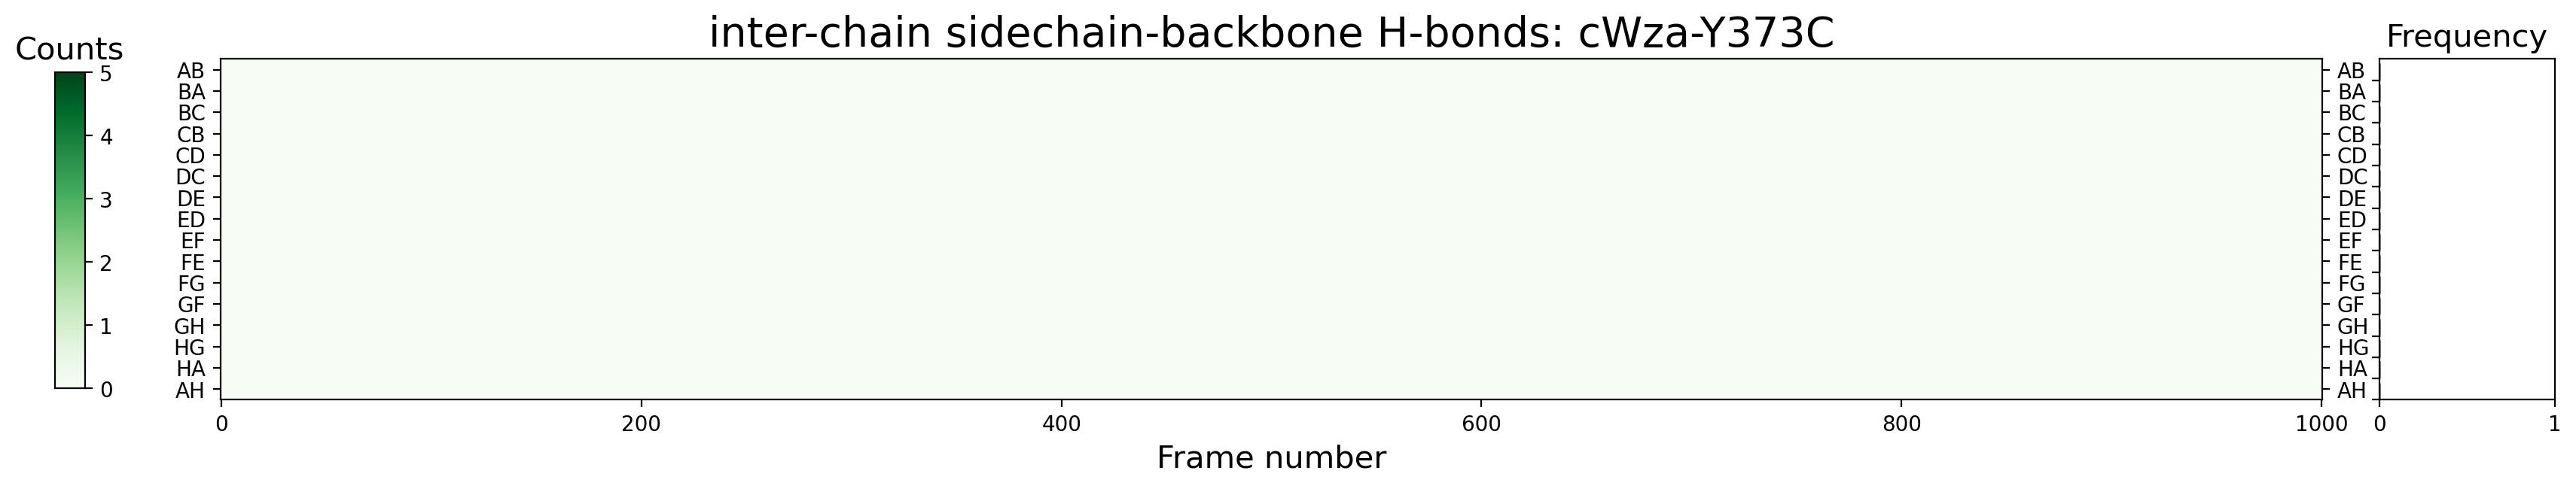

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_bb_bb
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = 5,#data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("inter-chain sidechain-backbone H-bonds: cWza-Y373C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: SC-BB H-bonds,  heatmaps

We can't visualise these data, as these are null for all chain pairs.
The test below proves it.

In [9]:
all([all(HBA_data_sc_bb[key]['time'] == 0) for key in HBA_data_sc_bb.keys()])

False

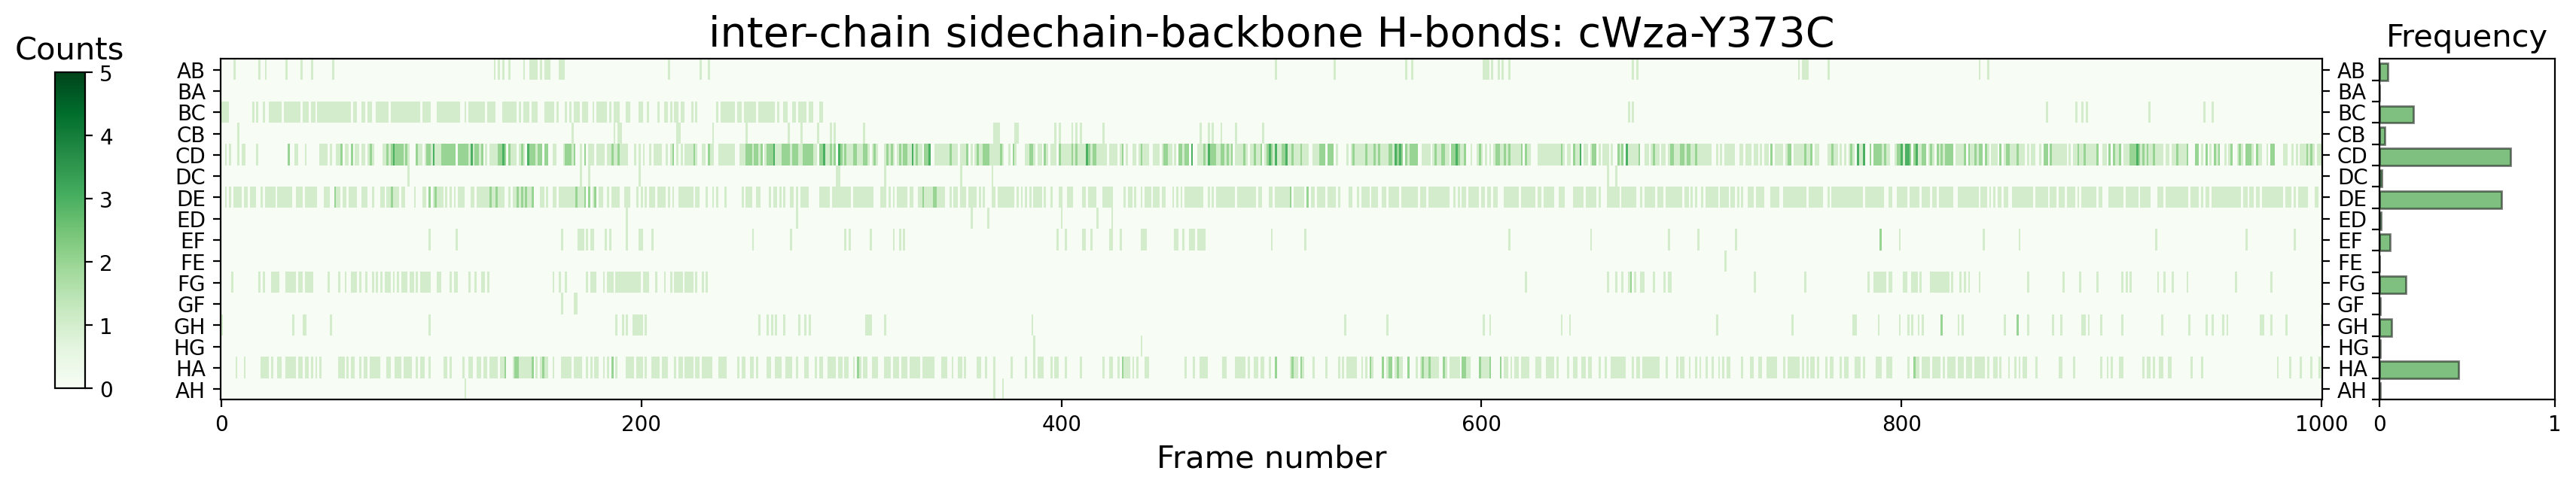

In [22]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_sc_bb
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = 5,#data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("inter-chain sidechain-backbone H-bonds: cWza-Y373C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: BB-SC H-bonds,  heatmaps

We can't visualise these data, as these are null for all chain pairs.
The test below proves it.

In [11]:
all([all(HBA_data_bb_sc[key]['time'] == 0) for key in HBA_data_bb_sc.keys()])

False

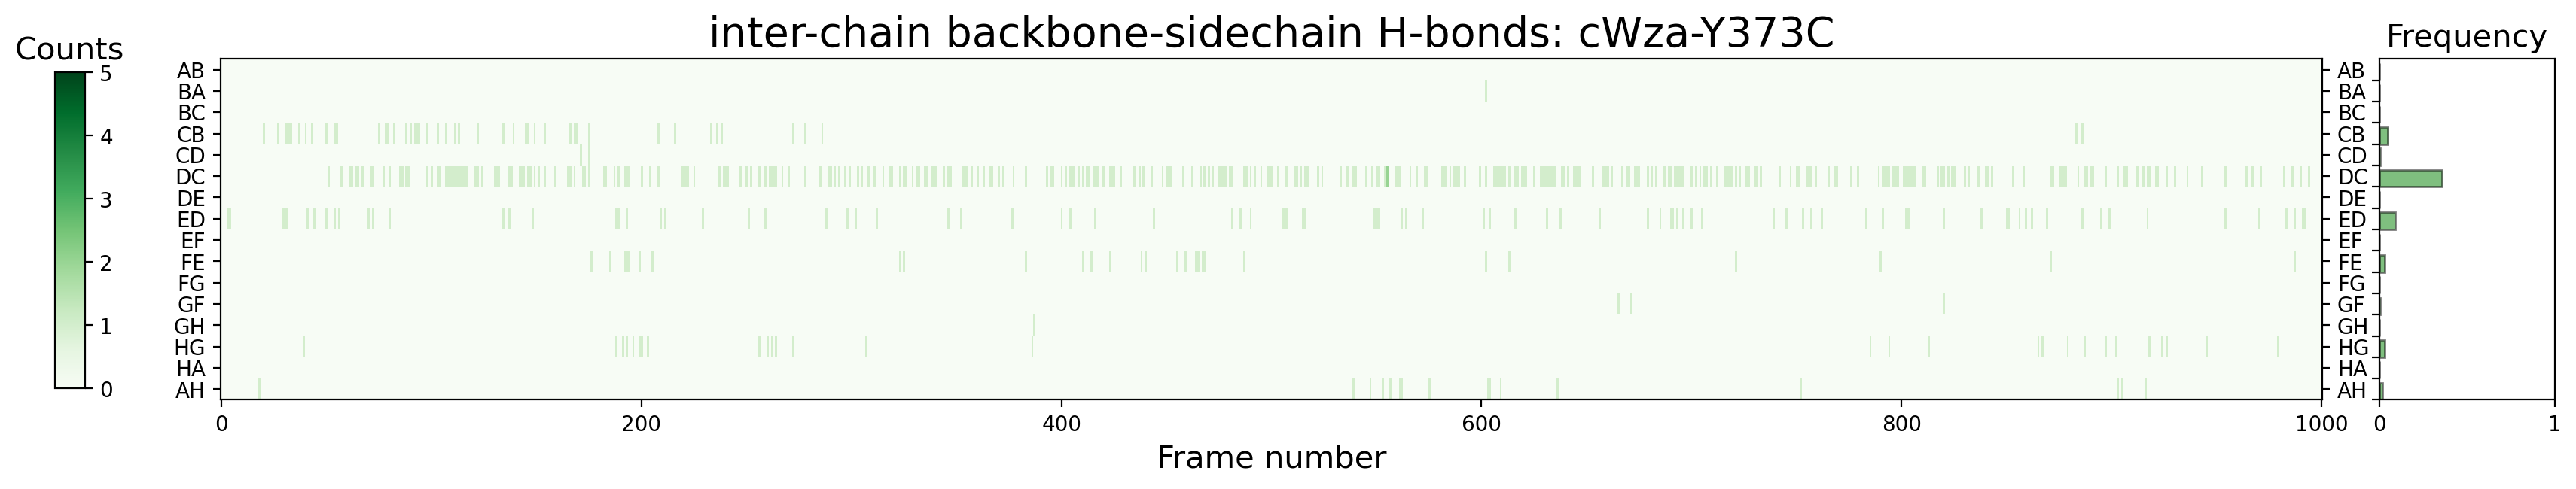

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_bb_sc
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = 5,#data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("inter-chain backbone-sidechain H-bonds: cWza-Y373C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: SC-SC H-bonds,  heatmaps

In [13]:
all([all(HBA_data_sc_sc[key]['time'] == 0) for key in HBA_data_sc_sc.keys()])

False

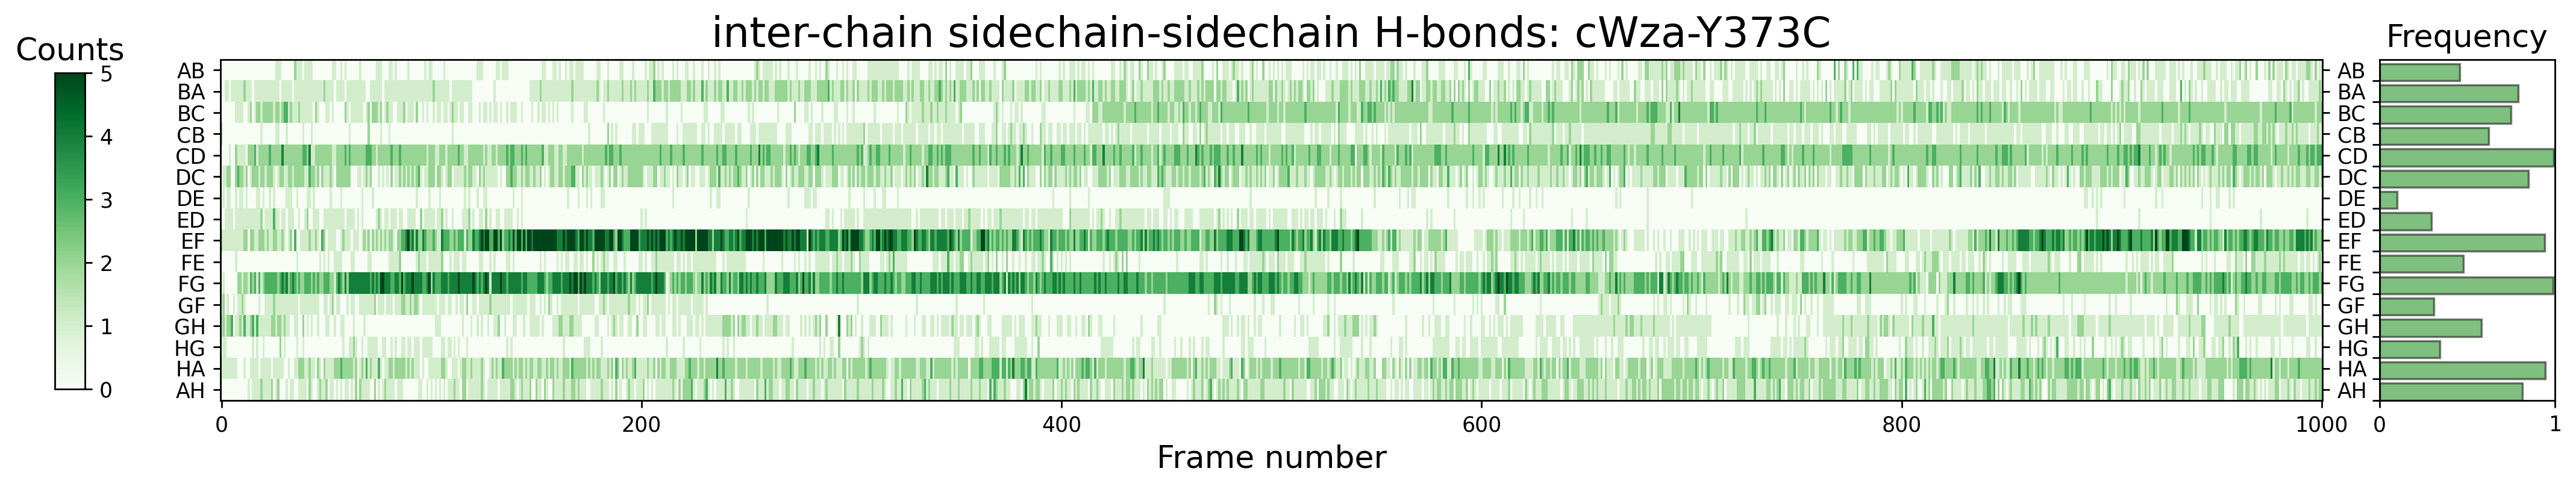

In [20]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_sc_sc
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=250)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = 5,#data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("inter-chain sidechain-sidechain H-bonds: cWza-Y373C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

Binary 

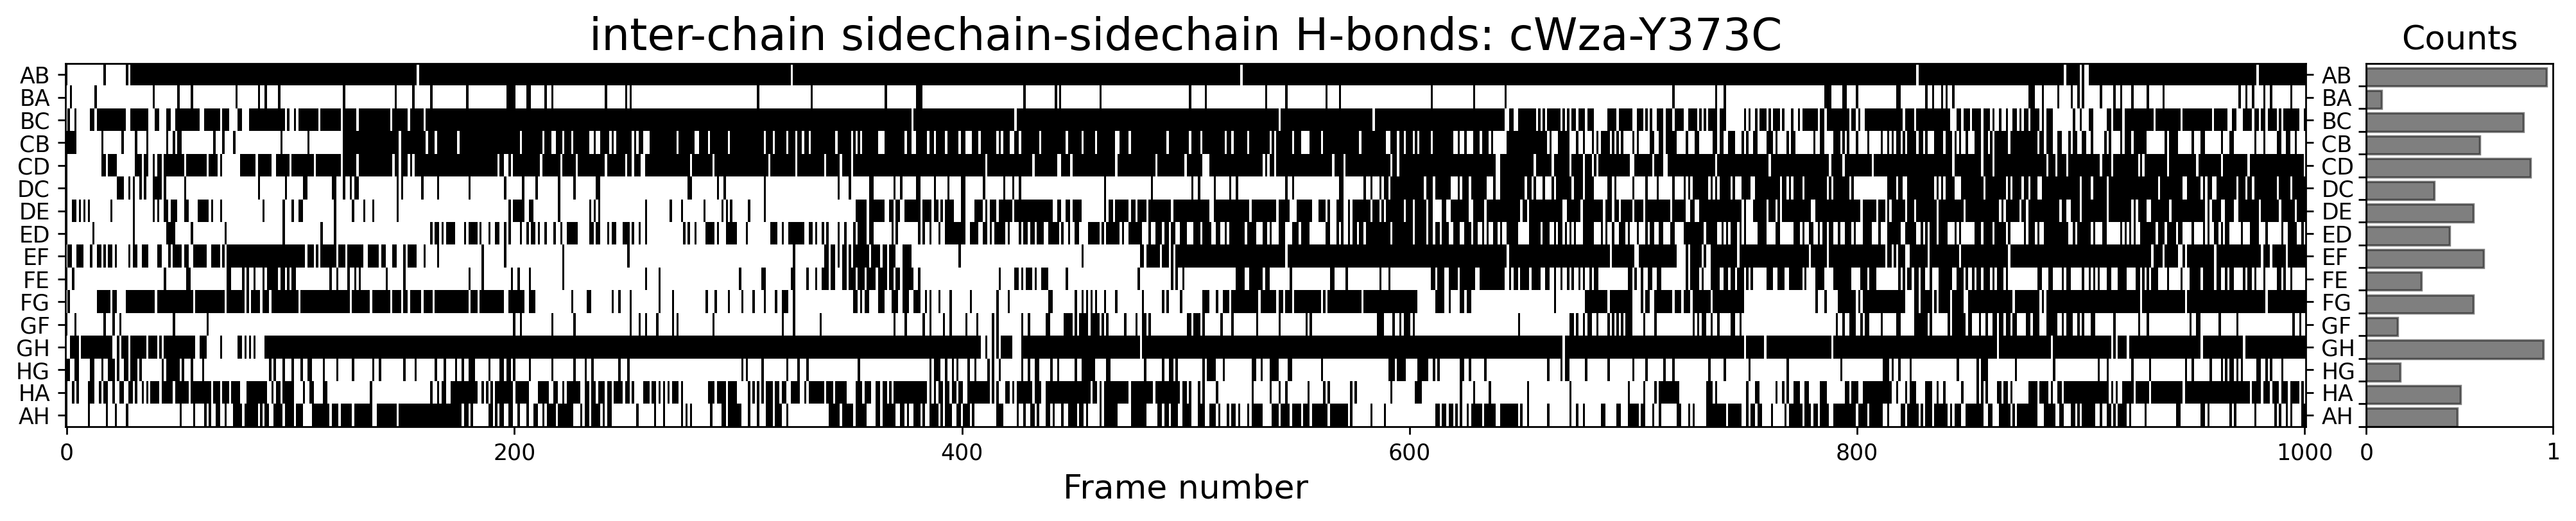

In [56]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_sc_sc
data_matrix = np.array([np.array(X[key]['time']) > 0 for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=250)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               #vmin = 0,
               #vmax = 5,#data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="binary",
               alpha=1)

# customise colorbar
# cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
# plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("inter-chain sidechain-sidechain H-bonds: cWza-Y373C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='black', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Save data

In [15]:
HBA_data_all = {'bb-bb':HBA_data_bb_bb,
                'bb-sc':HBA_data_bb_sc,
                'sc-bb':HBA_data_sc_bb,
                'sc-sc':HBA_data_sc_sc}

In [16]:
import pickle
with open("data/cWza-Y373C_0337_HBA.pckl",'wb') as fp:
    pickle.dump(HBA_data_all, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
ls -lrth data/cWza-Y373C_0337_HBA.pckl

-rw------- 1 sanjuan acadrel 636K Oct  1 18:47 data/cWza-Y373C_0337_HBA.pckl


# Intra-chain H-bonds: cWza-S355C

In [1]:
import sys
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

In [2]:
import MDAnalysis as mda
workdir = "data/cWza-S355C_conformation1_0050/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

## Analysis: BB-BB H-bonds

In [3]:
HBA_data = {}

chains = "abcdefgh"
for i in range(8):
    k1, k2 = (i, (i)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
HBA_data_bb_bb = HBA_data

INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  backbone and segid seg_0_Protein_chain_A


/homes/sanjuan/.local/lib/python3.8/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:662: DeprecationWarning: The `hbonds` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.hbonds` instead.
  warnings.warn(wmsg, DeprecationWarning)


INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_3_Protein_chain_D
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_4_Protein_chain_E
ACCEPTOR:  backbone and segid seg_4_Protein_chain_E
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_5_Protein_chain_F
ACCEPTOR:  backbone and segid seg_5_Protein_chain_F
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_6_Protein_chain_G
ACCEPTOR:  backbone and segid seg_6_Protein_chain_G
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_7_Protein_chain_H
ACCEPTOR:  backbone and segid seg_7_P

## Analysis: SC-SC H-bonds

In [4]:
HBA_data = {}

chains = "abcdefgh"
for i in range(8):
    k1, k2 = (i, (i)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_sc_sc = HBA_data

INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  not backbone and segid seg_0_Protein_chain_A
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  not backbone and segid seg_3_Protein_chain_D
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_4_Protein_chain_E
ACCEPTOR:  not backbone and segid seg_4_Protein_chain_E
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_5_Protein_chain_F
ACCEPTOR:  not backbone and segid seg_5_Protein_chain_F
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_6_P

## Analysis: SC-BB H-bonds

In [5]:
HBA_data = {}

chains = "abcdefgh"
for i in range(8):
    k1, k2 = (i, (i)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_sc_bb = HBA_data

INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  backbone and segid seg_0_Protein_chain_A
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_3_Protein_chain_D
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_4_Protein_chain_E
ACCEPTOR:  backbone and segid seg_4_Protein_chain_E
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_5_Protein_chain_F
ACCEPTOR:  backbone and segid seg_5_Protein_chain_F
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_6_Protein_chain_G
ACCEPTOR:

## Analysis: BB-SC H-bonds

In [6]:
HBA_data = {}

chains = "abcdefgh"
for i in range(8):
    k1, k2 = (i, (i)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_bb_sc = HBA_data

INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  not backbone and segid seg_0_Protein_chain_A
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  not backbone and segid seg_3_Protein_chain_D
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_4_Protein_chain_E
ACCEPTOR:  not backbone and segid seg_4_Protein_chain_E
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_5_Protein_chain_F
ACCEPTOR:  not backbone and segid seg_5_Protein_chain_F
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_6_Protein_chain_G
ACCEPTOR:  no

## Save data

In [9]:
HBA_data_all = {'bb-bb':HBA_data_bb_bb,
                'bb-sc':HBA_data_bb_sc,
                'sc-bb':HBA_data_sc_bb,
                'sc-sc':HBA_data_sc_sc}

In [10]:
import pickle
with open("data/cWza-S355C_0050_HBA-intrachain.pckl",'wb') as fp:
    pickle.dump(HBA_data_all, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
ls -lrth data/cWza-S355C_0050_HBA-intrachain.pckl

-rw------- 1 sanjuan acadrel 972K Oct  2 13:13 data/cWza-S355C_0050_HBA-intrachain.pckl


## Visualisation: BB-BB H-bonds,  heatmaps

In [13]:
all([all(HBA_data_bb_bb[key]['time'] == 0) for key in HBA_data_bb_bb.keys()])

False

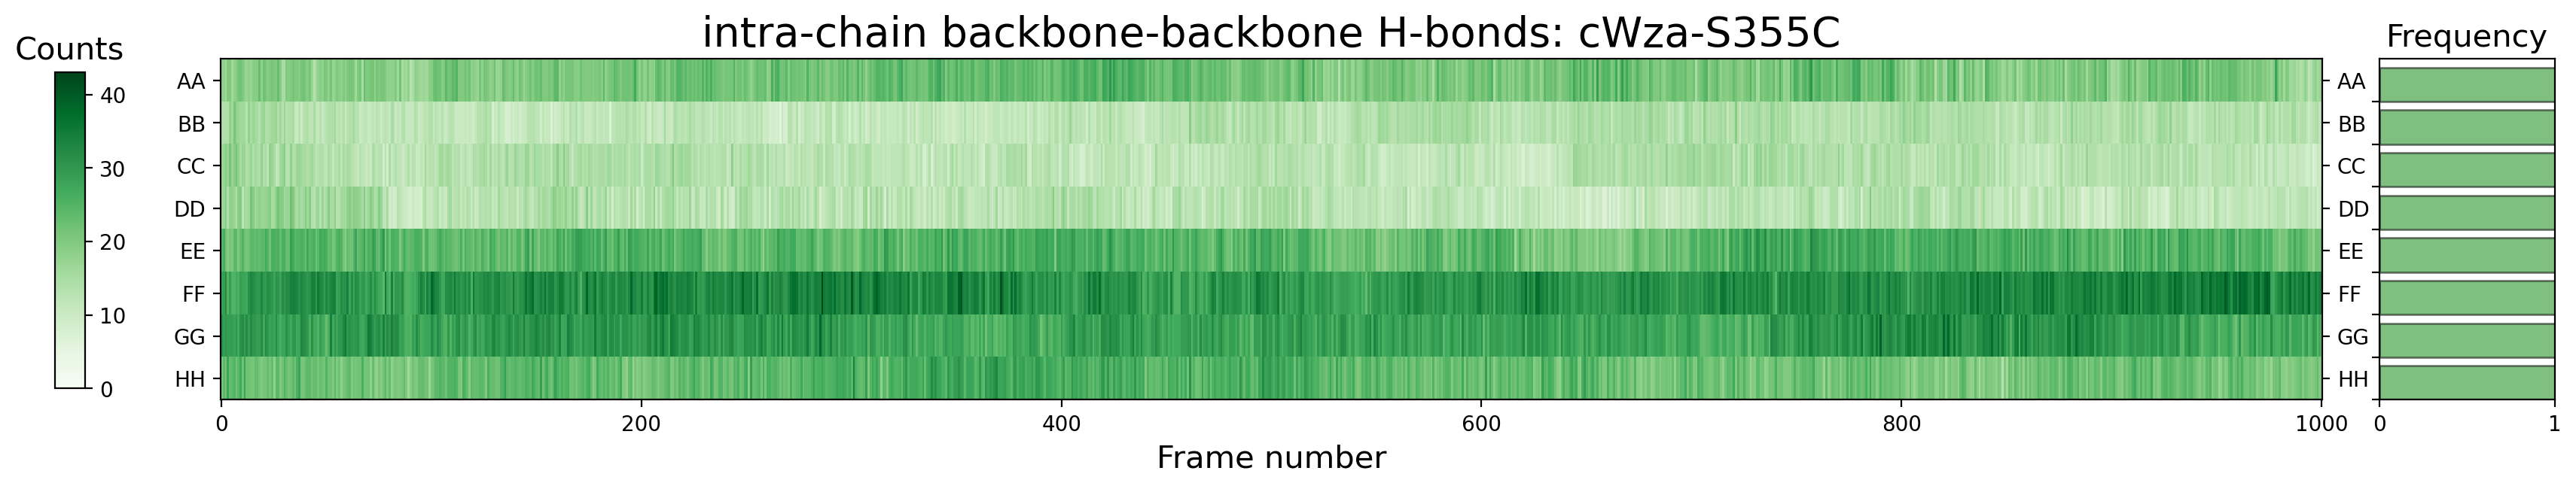

In [24]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_bb_bb
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("intra-chain backbone-backbone H-bonds: cWza-S355C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: SC-BB H-bonds,  heatmaps

We can't visualise these data, as these are null for all chain pairs.
The test below proves it.

In [25]:
all([all(HBA_data_sc_bb[key]['time'] == 0) for key in HBA_data_sc_bb.keys()])

False

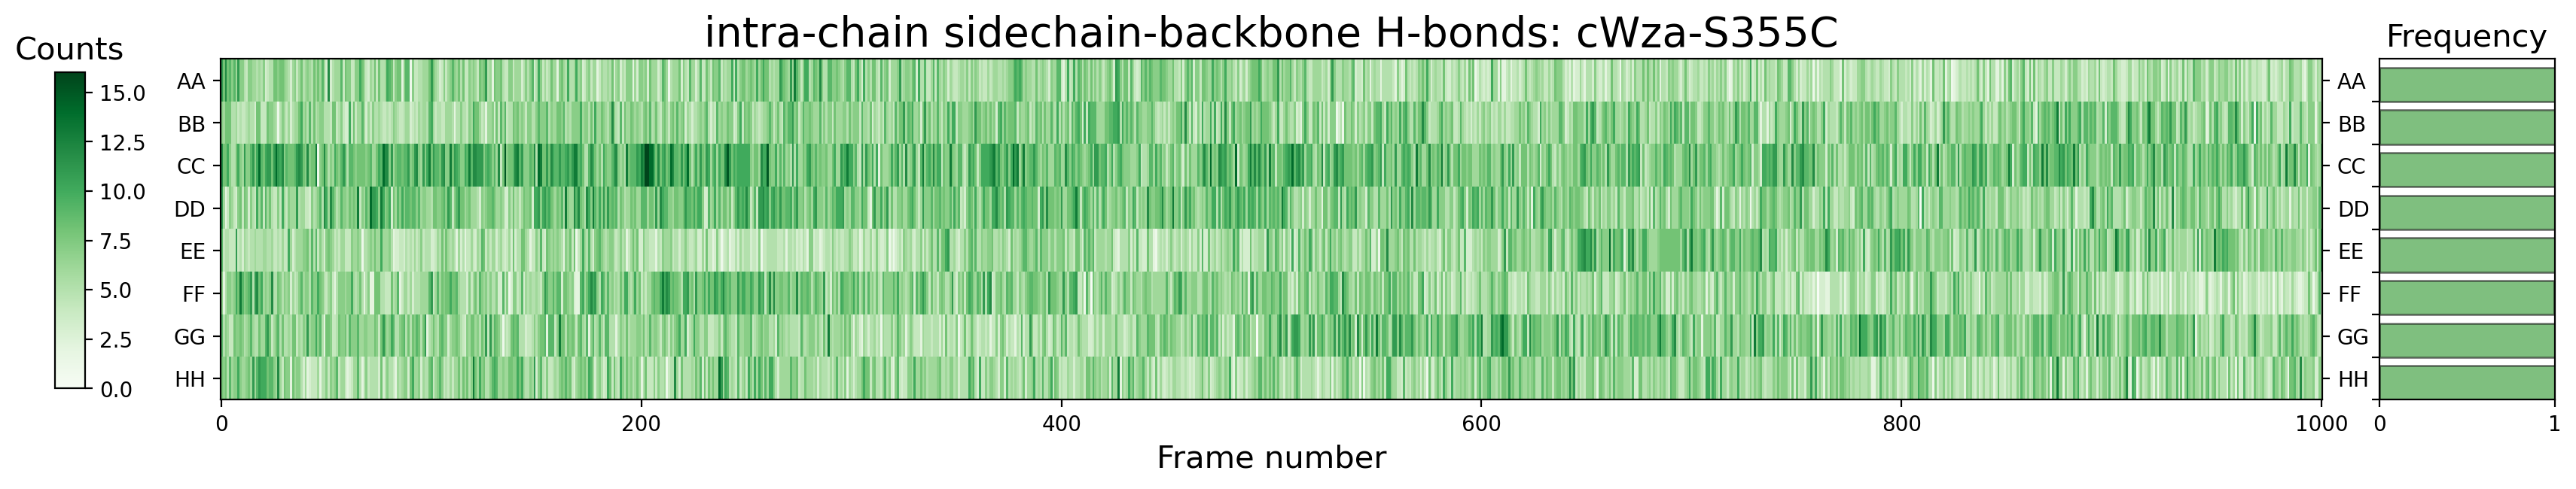

In [26]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_sc_bb
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("intra-chain sidechain-backbone H-bonds: cWza-S355C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: BB-SC H-bonds,  heatmaps

We can't visualise these data, as these are null for all chain pairs.
The test below proves it.

In [27]:
all([all(HBA_data_bb_sc[key]['time'] == 0) for key in HBA_data_bb_sc.keys()])

False

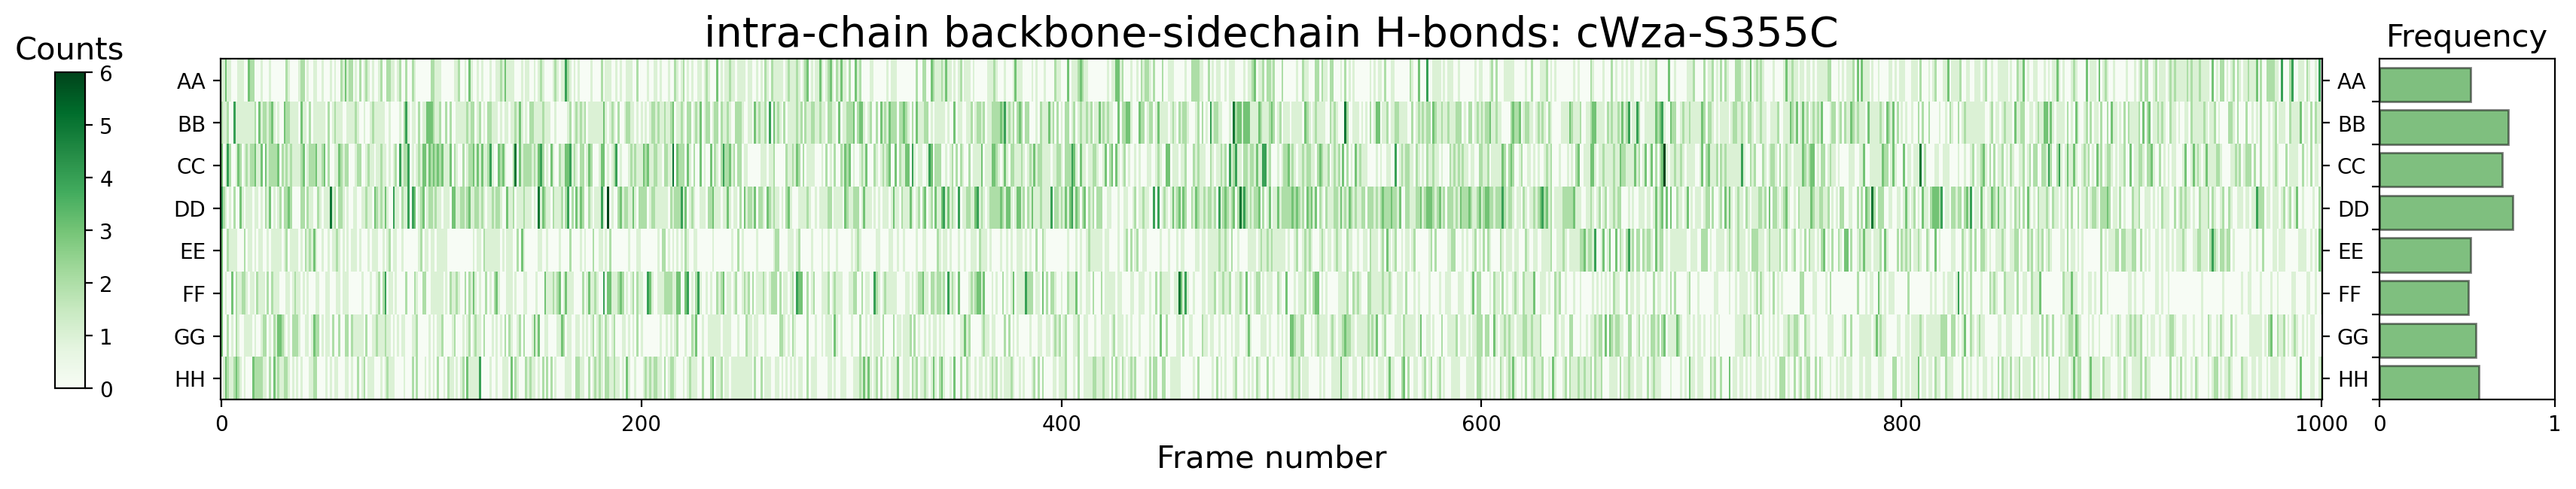

In [28]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_bb_sc
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("intra-chain backbone-sidechain H-bonds: cWza-S355C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

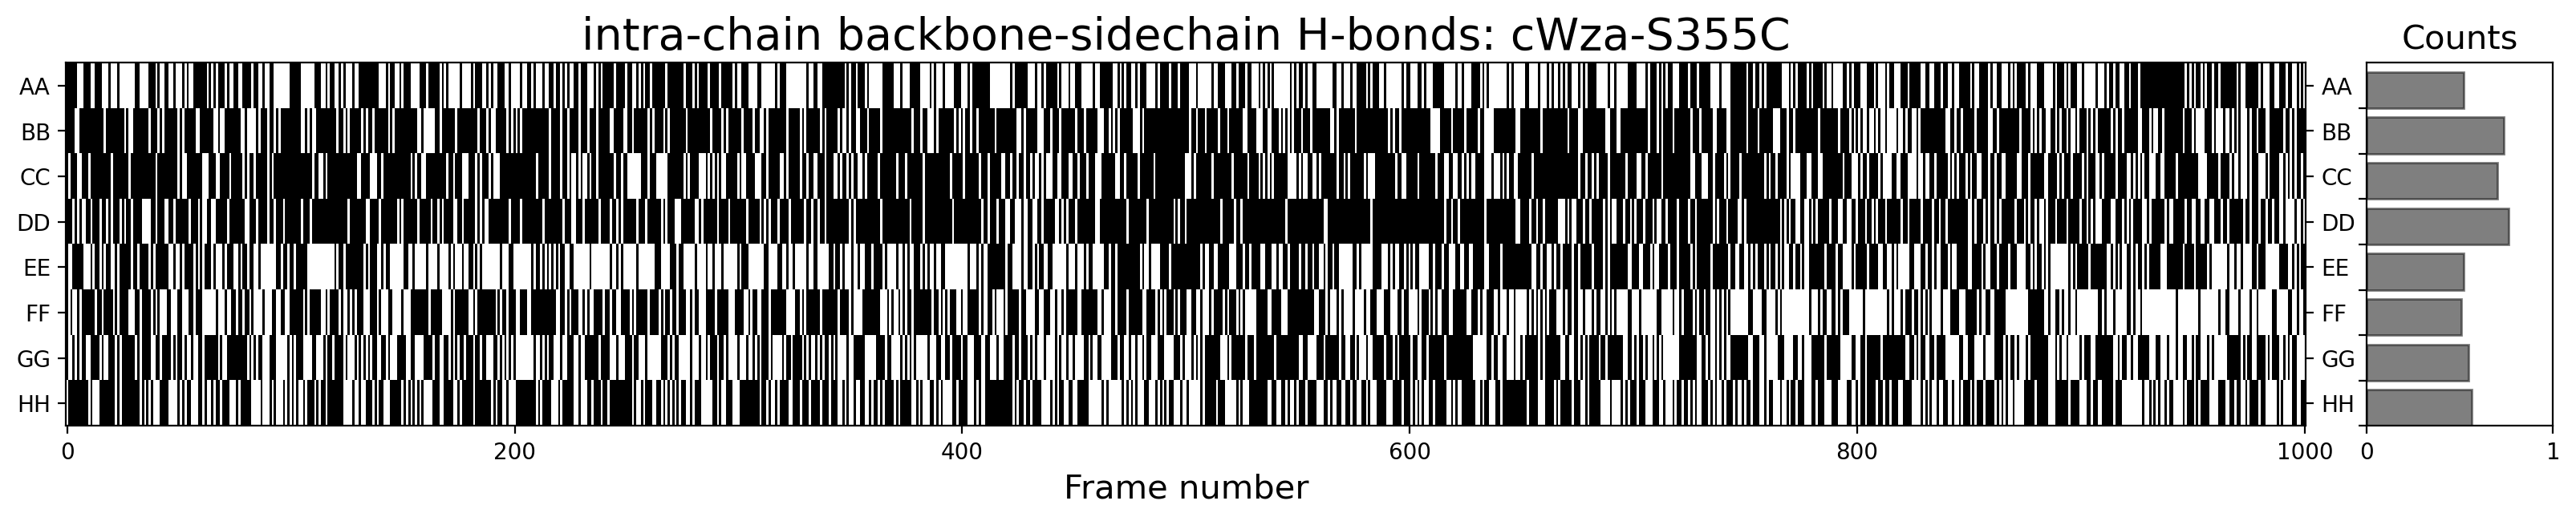

In [52]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_bb_sc
data_matrix = np.array([np.array(X[key]['time'])>0 for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="binary",
               alpha=1)

# customise colorbar
# cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
# plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("intra-chain backbone-sidechain H-bonds: cWza-S355C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='black', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: SC-SC H-bonds,  heatmaps

In [29]:
all([all(HBA_data_sc_sc[key]['time'] == 0) for key in HBA_data_sc_sc.keys()])

False

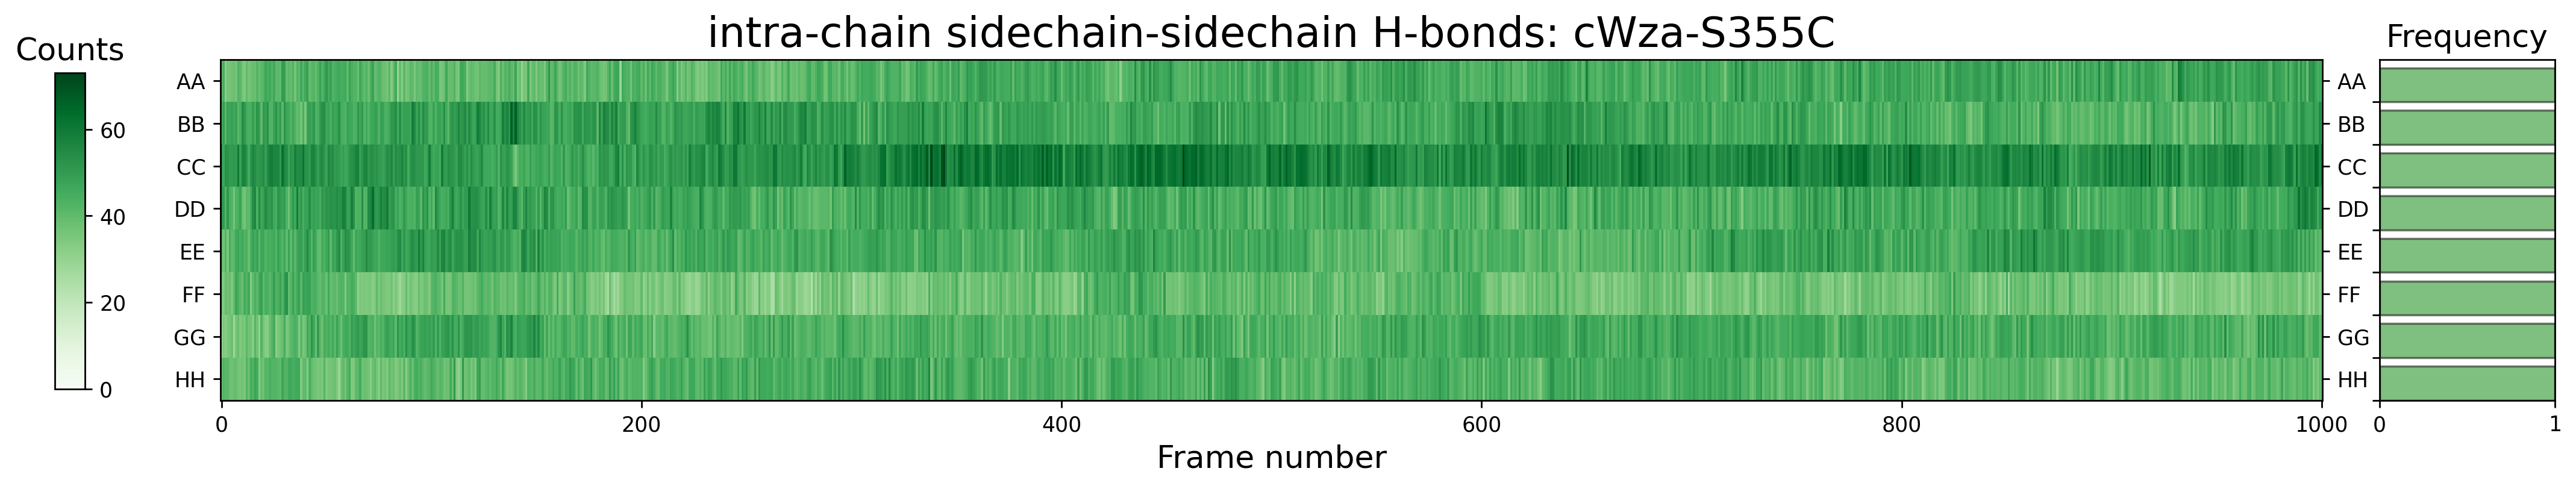

In [30]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_sc_sc
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=250)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("intra-chain sidechain-sidechain H-bonds: cWza-S355C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

# Intra-chain H-bonds: cWza-Y373C

In [31]:
import sys
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

In [32]:
import MDAnalysis as mda
workdir = "data/cWza-Y373C_conformation1_0337/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

## Analysis: BB-BB H-bonds

In [33]:
HBA_data = {}

chains = "abcdefgh"
for i in range(8):
    k1, k2 = (i, (i)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
HBA_data_bb_bb = HBA_data

INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  backbone and segid seg_0_Protein_chain_A


/homes/sanjuan/.local/lib/python3.8/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:662: DeprecationWarning: The `hbonds` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.hbonds` instead.
  warnings.warn(wmsg, DeprecationWarning)


INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_3_Protein_chain_D
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_4_Protein_chain_E
ACCEPTOR:  backbone and segid seg_4_Protein_chain_E
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_5_Protein_chain_F
ACCEPTOR:  backbone and segid seg_5_Protein_chain_F
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_6_Protein_chain_G
ACCEPTOR:  backbone and segid seg_6_Protein_chain_G
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_7_Protein_chain_H
ACCEPTOR:  backbone and segid seg_7_P

## Analysis: SC-SC H-bonds

In [34]:
HBA_data = {}

chains = "abcdefgh"
for i in range(8):
    k1, k2 = (i, (i)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_sc_sc = HBA_data

INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  not backbone and segid seg_0_Protein_chain_A
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  not backbone and segid seg_3_Protein_chain_D
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_4_Protein_chain_E
ACCEPTOR:  not backbone and segid seg_4_Protein_chain_E
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_5_Protein_chain_F
ACCEPTOR:  not backbone and segid seg_5_Protein_chain_F
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_6_P

## Analysis: SC-BB H-bonds

In [35]:
HBA_data = {}

chains = "abcdefgh"
for i in range(8):
    k1, k2 = (i, (i)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"not backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_sc_bb = HBA_data

INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  backbone and segid seg_0_Protein_chain_A
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  backbone and segid seg_1_Protein_chain_B
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  backbone and segid seg_2_Protein_chain_C
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  backbone and segid seg_3_Protein_chain_D
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_4_Protein_chain_E
ACCEPTOR:  backbone and segid seg_4_Protein_chain_E
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_5_Protein_chain_F
ACCEPTOR:  backbone and segid seg_5_Protein_chain_F
INFO: Searching for H-bonds
You selected...
DONOR:  not backbone and segid seg_6_Protein_chain_G
ACCEPTOR:

## Analysis: BB-SC H-bonds

In [36]:
HBA_data = {}

chains = "abcdefgh"
for i in range(8):
    k1, k2 = (i, (i)%8)
    chain1_name = chains[k1].upper()
    chain2_name = chains[k2].upper()    
    donor_selection = "seg_"+str(k1)+"_Protein_chain_"+chain1_name
    acceptor_selection = "seg_"+str(k2)+"_Protein_chain_"+chain2_name

    # Clockwise H-bonds
    print("INFO: Searching for H-bonds")
    print("You selected...")
    hbonds = HBA(universe=u)
    protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
    protein_acceptors_sel = hbonds.guess_acceptors("protein")
    hbonds.hydrogens_sel = f"backbone and segid " + donor_selection
    print("DONOR: ", hbonds.hydrogens_sel)
    hbonds.acceptors_sel = f"not backbone and segid " + acceptor_selection
    print("ACCEPTOR: ", hbonds.acceptors_sel)
    hbonds.run()
    
    HBA_data[chain1_name + chain2_name] = {'ids': hbonds.count_by_ids(),
                                           'type': hbonds.count_by_type(),
                                           'time': hbonds.count_by_time()}
    
HBA_data_bb_sc = HBA_data

INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_0_Protein_chain_A
ACCEPTOR:  not backbone and segid seg_0_Protein_chain_A
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_1_Protein_chain_B
ACCEPTOR:  not backbone and segid seg_1_Protein_chain_B
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_2_Protein_chain_C
ACCEPTOR:  not backbone and segid seg_2_Protein_chain_C
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_3_Protein_chain_D
ACCEPTOR:  not backbone and segid seg_3_Protein_chain_D
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_4_Protein_chain_E
ACCEPTOR:  not backbone and segid seg_4_Protein_chain_E
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_5_Protein_chain_F
ACCEPTOR:  not backbone and segid seg_5_Protein_chain_F
INFO: Searching for H-bonds
You selected...
DONOR:  backbone and segid seg_6_Protein_chain_G
ACCEPTOR:  no

## Save data

In [37]:
HBA_data_all = {'bb-bb':HBA_data_bb_bb,
                'bb-sc':HBA_data_bb_sc,
                'sc-bb':HBA_data_sc_bb,
                'sc-sc':HBA_data_sc_sc}

In [38]:
import pickle
with open("data/cWza-Y373C_0337_HBA-intrachain.pckl3",'wb') as fp:
    pickle.dump(HBA_data_all, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
ls -lrth data/cWza-Y373C_0337_HBA-intrachain.pckl

ls: cannot access 'data/cWza-Y373C_0337_HBA-intrachain.pckl': No such file or directory


## Visualisation: BB-BB H-bonds,  heatmaps

In [40]:
all([all(HBA_data_bb_bb[key]['time'] == 0) for key in HBA_data_bb_bb.keys()])

False

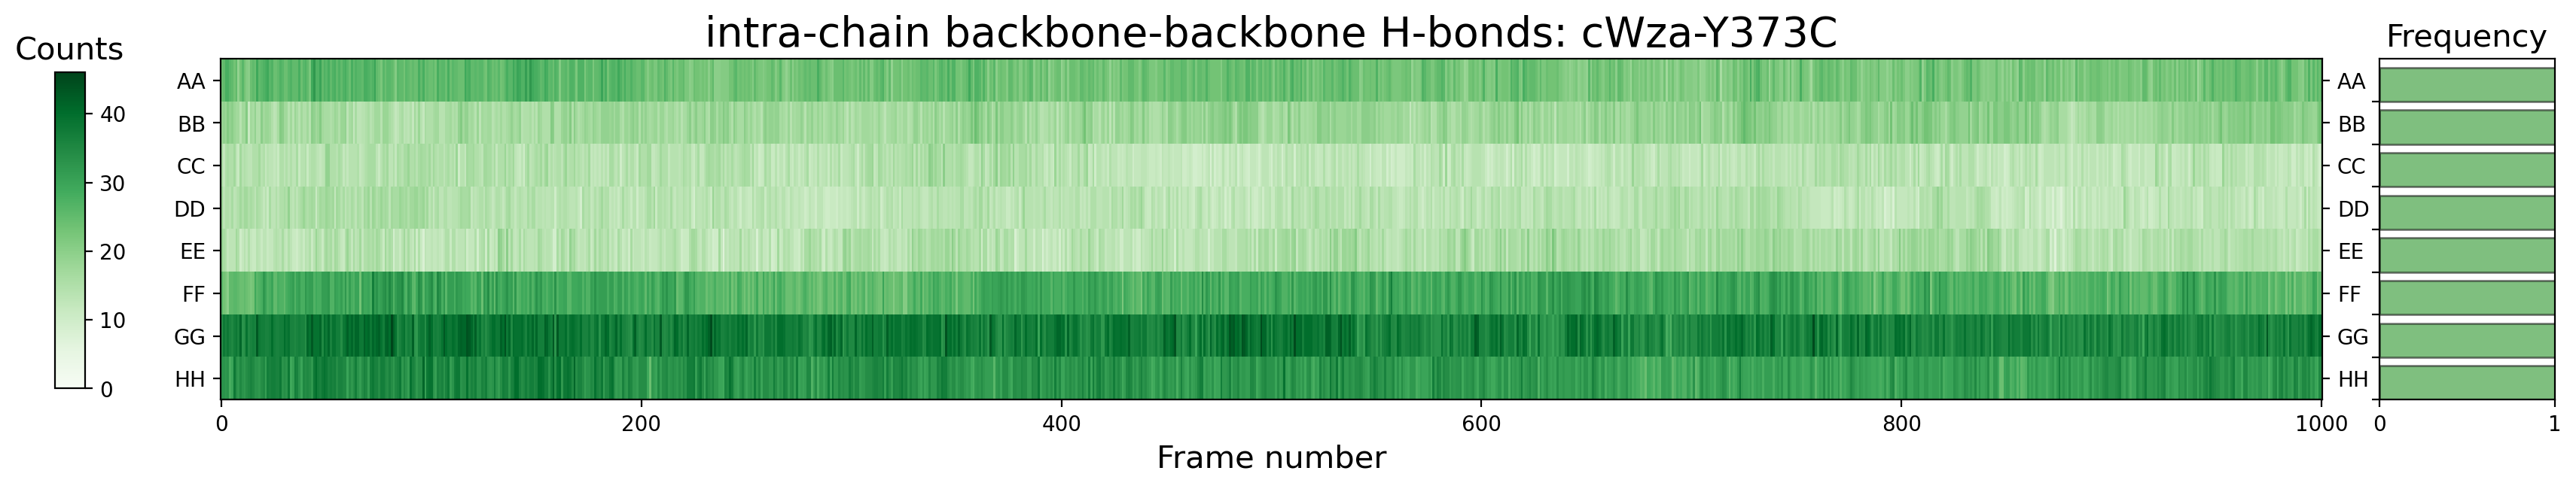

In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_bb_bb
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("intra-chain backbone-backbone H-bonds: cWza-Y373C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: SC-BB H-bonds,  heatmaps

We can't visualise these data, as these are null for all chain pairs.
The test below proves it.

In [42]:
all([all(HBA_data_sc_bb[key]['time'] == 0) for key in HBA_data_sc_bb.keys()])

False

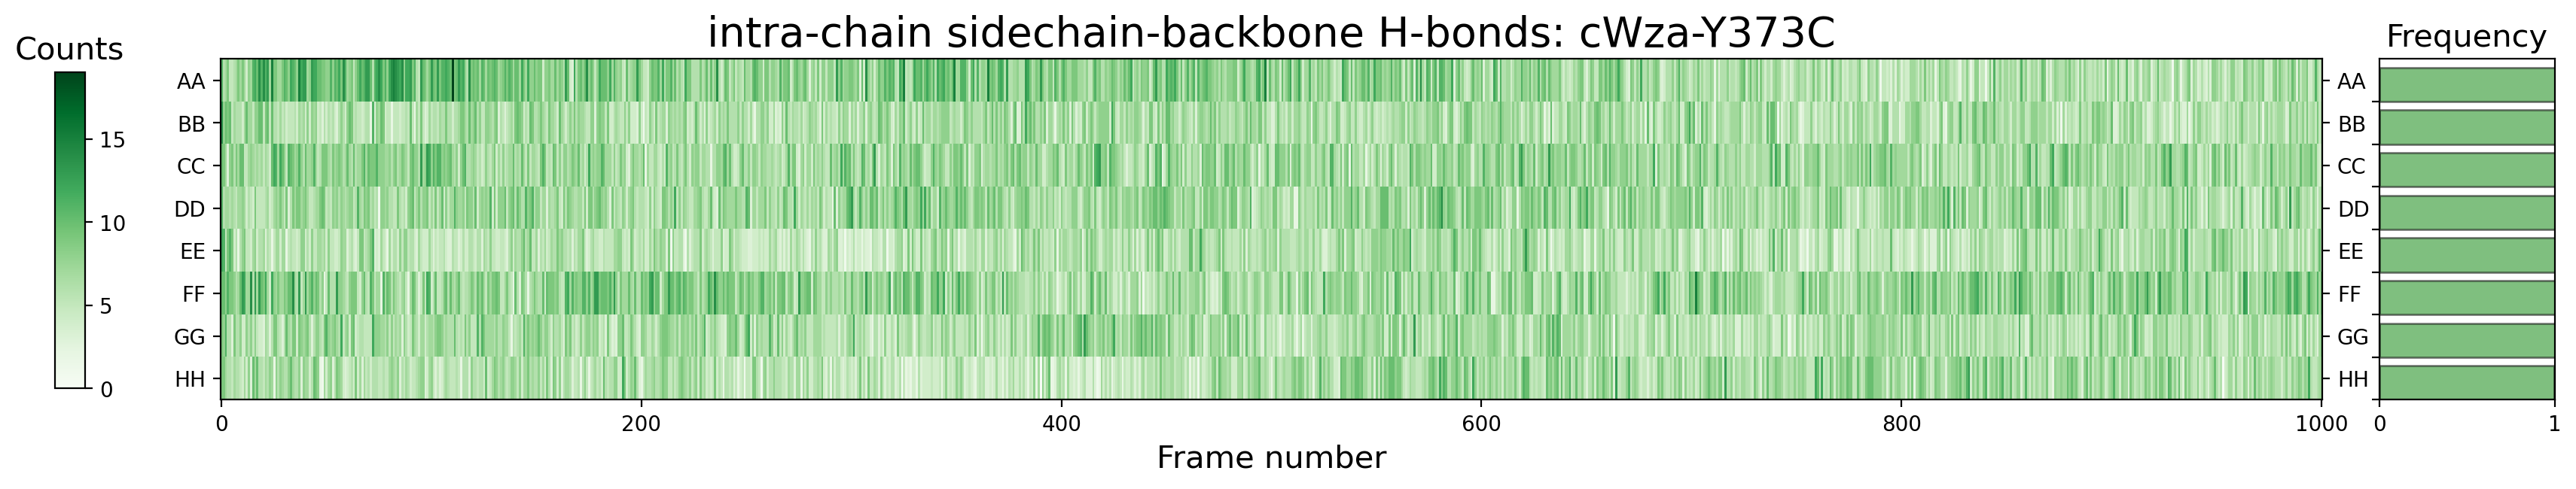

In [43]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_sc_bb
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("intra-chain sidechain-backbone H-bonds: cWza-Y373C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: BB-SC H-bonds,  heatmaps

We can't visualise these data, as these are null for all chain pairs.
The test below proves it.

In [44]:
all([all(HBA_data_bb_sc[key]['time'] == 0) for key in HBA_data_bb_sc.keys()])

False

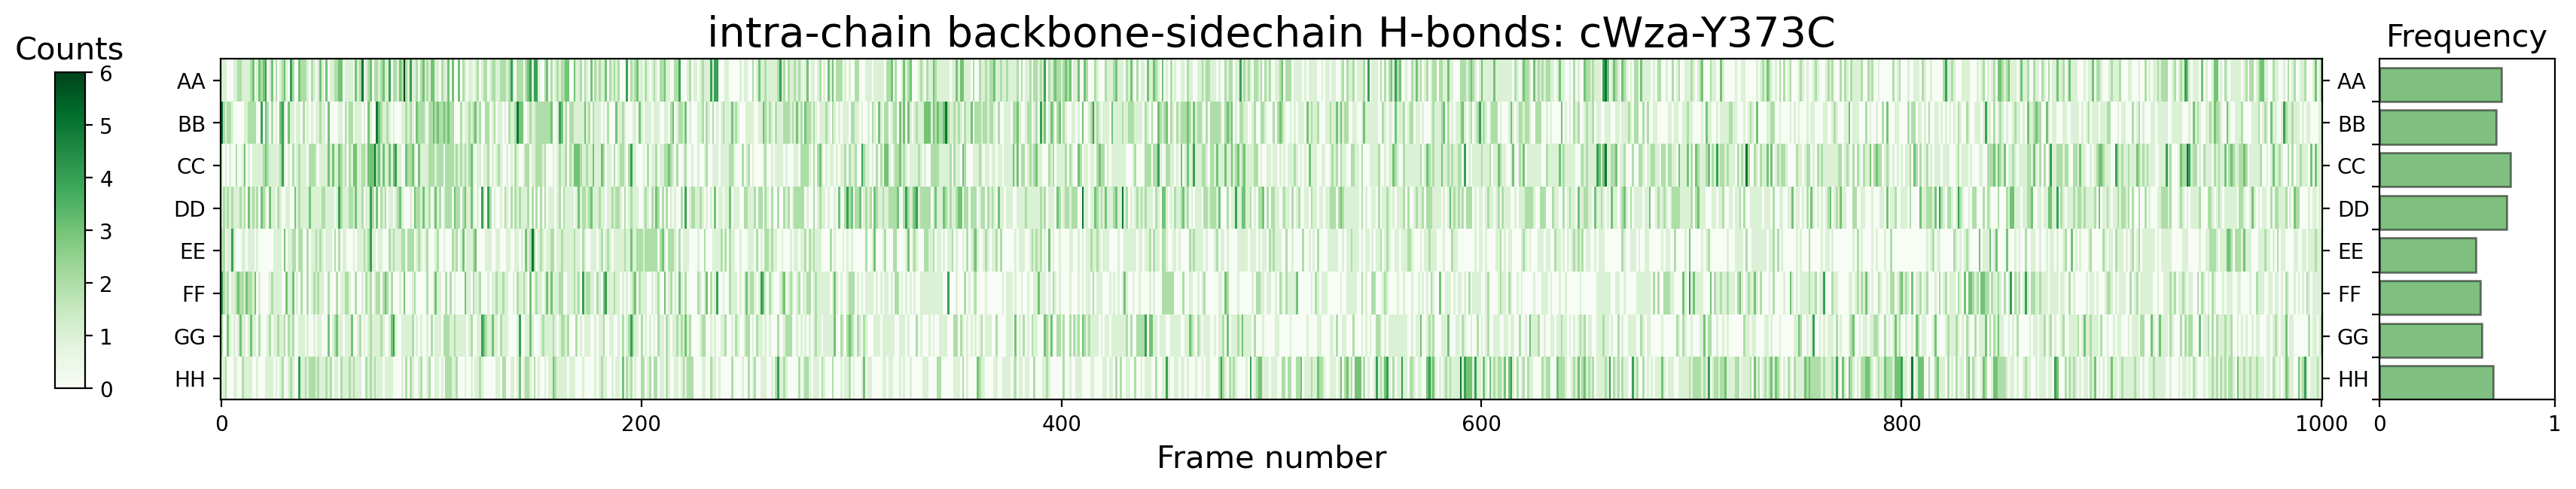

In [45]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_bb_sc
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("intra-chain backbone-sidechain H-bonds: cWza-Y373C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

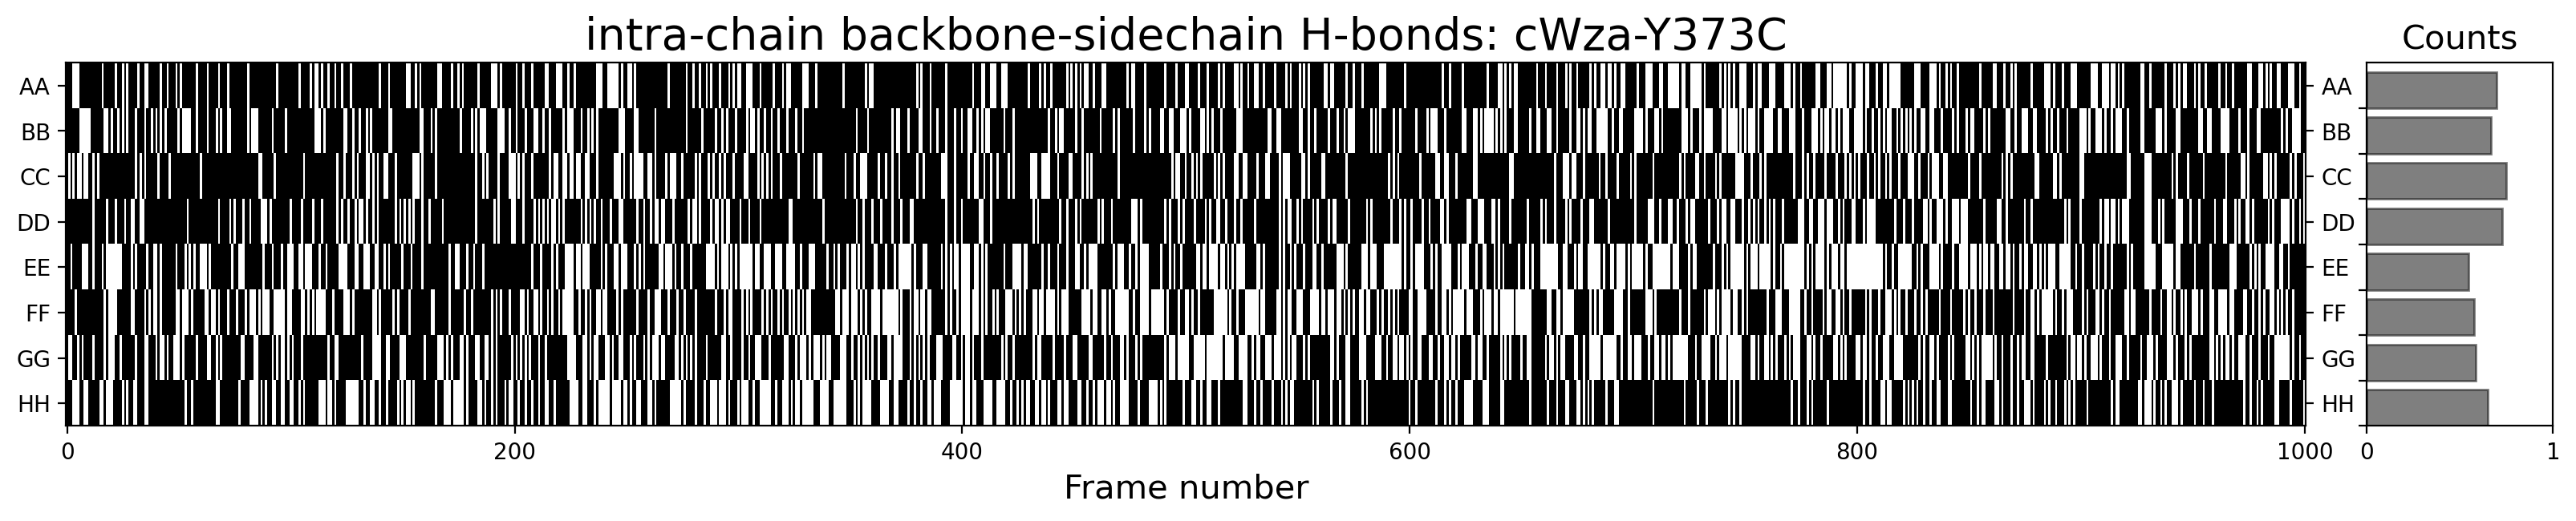

In [49]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_bb_sc
data_matrix = np.array([np.array(X[key]['time'])>0 for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="binary",
               alpha=1)

# customise colorbar
# cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
# plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("intra-chain backbone-sidechain H-bonds: cWza-Y373C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='black', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Visualisation: SC-SC H-bonds,  heatmaps

In [46]:
all([all(HBA_data_sc_sc[key]['time'] == 0) for key in HBA_data_sc_sc.keys()])

False

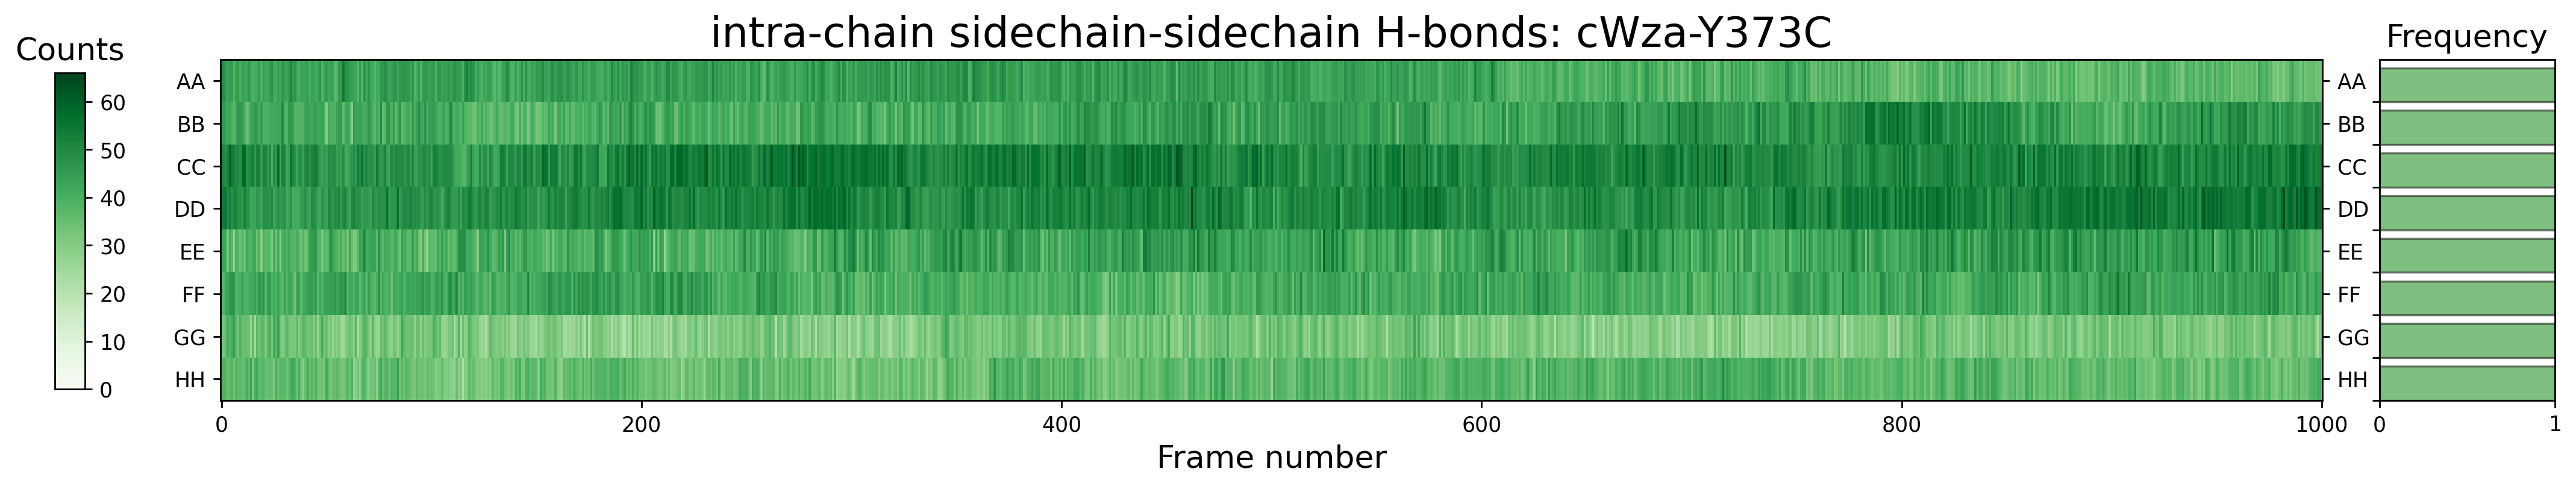

In [47]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

X = HBA_data_sc_sc
data_matrix = np.array([np.array(X[key]['time']) for key in X.keys()])
    
#fig,axes = plt.subplots(1,2,figsize=(20,5),dpi=200)
fig = plt.figure(figsize=(20,3), dpi=250)
gs = fig.add_gridspec(1, 2, width_ratios=[12,1])
#gs = gridspec.GridSpec(1, 2, width_ratios=[3,1])
axes = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="Greens",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.07, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)
# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(list(X.keys()))
ax.set_xlabel('Frame number', fontsize=15)
ax.set_title("intra-chain sidechain-sidechain H-bonds: cWza-Y373C", fontsize=20)



ax = axes[1]
hist_data = np.sum(data_matrix != 0, axis=1)/1000
hist_data = list(reversed(hist_data))
ax.barh(range(len(X.keys())), hist_data, color='green', align='edge', alpha=0.5, edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels([])
ax.set_ylim(0, len(X.keys()))
ax.set_title('Frequency', fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

# Refined H-bond analysis

In [1]:
import sys
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

In [2]:
workdir = "data/cWza-S355C_conformation1_0050/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

**FIRST** Run overall H-bonds analysis for protein-protein selection

In [3]:
hbonds = HBA(universe=u)
hbonds.hydrogens_sel = hbonds.guess_hydrogens("protein")
hbonds.acceptors_sel = hbonds.guess_acceptors("protein")
hbonds.run()

**SECOND** Find out what H-bond types (MDAnalysis defintion) lead to the highest counts

In [4]:
hbond_counting_raw = hbonds.count_by_type()
hbond_counting_sorted = sorted(hbond_counting_raw, key=lambda x: int(x[-1]), reverse=True)
hbond_counting_sorted

/homes/sanjuan/.local/lib/python3.8/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:662: DeprecationWarning: The `hbonds` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.hbonds` instead.
  warnings.warn(wmsg, DeprecationWarning)


[array(['ARG:opls_300', 'ASP:opls_272', '3259'], dtype='<U21'),
 array(['HIS:opls_503', 'ASP:opls_272', '3011'], dtype='<U21'),
 array(['TYR:opls_167', 'GLU:opls_272', '2347'], dtype='<U21'),
 array(['ARG:opls_300', 'GLU:opls_272', '1619'], dtype='<U21'),
 array(['ARG:opls_303', 'GLU:opls_272', '951'], dtype='<U21'),
 array(['ARG:opls_300', 'THR:opls_154', '782'], dtype='<U21'),
 array(['ARG:opls_300', 'THR:opls_272', '480'], dtype='<U21'),
 array(['THR:opls_154', 'ASP:opls_272', '475'], dtype='<U21'),
 array(['THR:opls_154', 'GLU:opls_272', '402'], dtype='<U21'),
 array(['LYS:opls_287', 'GLU:opls_272', '282'], dtype='<U21'),
 array(['LYS:opls_287', 'THR:opls_272', '245'], dtype='<U21'),
 array(['ARG:opls_303', 'THR:opls_154', '169'], dtype='<U21'),
 array(['THR:opls_154', 'THR:opls_272', '129'], dtype='<U21'),
 array(['ARG:opls_303', 'THR:opls_272', '97'], dtype='<U21'),
 array(['TYR:opls_167', 'THR:opls_272', '73'], dtype='<U21'),
 array(['TYR:opls_167', 'ASP:opls_272', '61'], dtype=

**THIRD** Filter the names of those residues contributing the most 

In [5]:
data_destilated = hbond_counting_sorted[:16]
set_donors_acceptors = set([(x[0].split(':')[0], x[1].split(':')[0]) for x in data_destilated])
set_donors_acceptors

{('ARG', 'ASP'),
 ('ARG', 'GLU'),
 ('ARG', 'THR'),
 ('HIS', 'ASP'),
 ('LYS', 'GLU'),
 ('LYS', 'THR'),
 ('THR', 'ASP'),
 ('THR', 'GLU'),
 ('THR', 'THR'),
 ('TYR', 'ASP'),
 ('TYR', 'GLU'),
 ('TYR', 'THR')}

**FOURTH** Find out the residuen numbers in the peptides with these names

In [120]:
def get_original_chain(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return x//N -1
    else:
        return x//N

In [61]:
def get_original_resnum(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return N
    else:
        return x%N

In [142]:
def find_resid(id, protein_atoms):
    f = get_original_chain
    g = get_original_resnum
    return [(str(f(atom.resid)), str(g(atom.resid)), atom.resname) for atom in protein_atoms if id == atom.id]

In [148]:
protein_atoms = list(u.select_atoms("protein"))

hdonor_acceptor_list = []
for data in hbonds.count_by_ids():
    hdonor_atom_id, _, acceptor_atom_id, _ = data
    hdonor = find_resid(hdonor_atom_id, protein_atoms)
    acceptor =  find_resid(acceptor_atom_id, protein_atoms)
    hdonor_acceptor = hdonor + acceptor
    hdonor_acceptor_list.append(('-'.join(hdonor[0]), '-'.join(acceptor[0])))

In [163]:
interchain_hbonds = []
intrachain_hbonds = []
for hdonor, acceptor in list(set(hdonor_acceptor_list)):
    
    hdonor_chain, hdonor_resnum, hdonor_resname = hdonor.split('-')
    acceptor_chain, acceptor_resnum, acceptor_resname = acceptor.split('-')
    
    if hdonor_chain == acceptor_chain:
        interchain_hbonds.append(('-'.join([hdonor_resnum, hdonor_resname]),
                                  '-'.join([acceptor_resnum, acceptor_resname])))
    else:
        intrachain_hbonds.append(('-'.join([hdonor_resnum, hdonor_resname]),
                                  '-'.join([acceptor_resnum, acceptor_resname])))

In [165]:
set(interchain_hbonds)

{('18-THR', '21-HIS'),
 ('21-HIS', '18-THR'),
 ('21-HIS', '24-THR'),
 ('26-THR', '25-GLU'),
 ('28-ARG', '21-HIS'),
 ('28-ARG', '24-THR'),
 ('28-ARG', '25-GLU'),
 ('28-ARG', '29-TYR'),
 ('28-ARG', '32-THR'),
 ('29-TYR', '25-GLU'),
 ('29-TYR', '32-THR'),
 ('31-LYS', '32-THR'),
 ('32-THR', '29-TYR'),
 ('32-THR', '32-THR'),
 ('5-ARG', '6-TRP'),
 ('6-TRP', '5-ARG')}

In [166]:
set(intrachain_hbonds)

{('18-THR', '22-ASP'),
 ('21-HIS', '22-ASP'),
 ('26-THR', '24-THR'),
 ('26-THR', '25-GLU'),
 ('26-THR', '28-ARG'),
 ('26-THR', '29-TYR'),
 ('26-THR', '32-THR'),
 ('28-ARG', '22-ASP'),
 ('28-ARG', '25-GLU'),
 ('28-ARG', '26-THR'),
 ('28-ARG', '32-THR'),
 ('29-TYR', '22-ASP'),
 ('29-TYR', '25-GLU'),
 ('29-TYR', '26-THR'),
 ('29-TYR', '29-TYR'),
 ('29-TYR', '32-THR'),
 ('31-LYS', '25-GLU'),
 ('31-LYS', '29-TYR'),
 ('31-LYS', '32-THR'),
 ('32-THR', '29-TYR'),
 ('32-THR', '32-THR'),
 ('7-ASN', '16-THR')}

In [167]:
set(interchain_hbonds).intersection(set(intrachain_hbonds))

{('26-THR', '25-GLU'),
 ('28-ARG', '25-GLU'),
 ('28-ARG', '32-THR'),
 ('29-TYR', '25-GLU'),
 ('29-TYR', '32-THR'),
 ('31-LYS', '32-THR'),
 ('32-THR', '29-TYR'),
 ('32-THR', '32-THR')}